In [133]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as path_effects
import seaborn as sns
import pandas as pd
import textwrap

In [134]:
song_df = pd.read_csv('../data/retreat_bingo_terms.csv', encoding='latin', header=None)

In [159]:
np.random.seed(None)

weight = 'hybrid'
top_word = 'GIZZO'
album_covers = True

def retreat_bingo(song_df, filename='output', top_word='GIZZO', seed=None):
    
    image_set = [('guy.png', 0.20),
                ('ibis_logo.png', 0.10),
                ('planaria.jpg', 0.20),
                ('axolotl.jpg', 0.16),
                 ('fly.jpeg', 0.16), 
                 ('schill.png', 0.18), 
                 ('jhu.jpg', 0.16),
                ('new-glarus.ai-converted.png', 0.40), 
                 ('wb.png', 0.20)]
    
    np.random.seed(seed)
    
    song_selection = np.random.choice(a=song_df[0], size=25, replace=False)
    song_selection = song_selection.reshape(5, 5)

    fig = plt.figure(figsize=(12,12))
    ax = plt.gca()
    #ax.set_aspect('equal')

    line_positions = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]

    for x in line_positions:
        ax.plot([x, x], [-0.5,4.5], color='k', linewidth=2.5)
        ax.plot([-0.5,4.5], [x,x], color='k', linewidth=2.5)

    song_selection[2][2] = 'FREE SPACE'

    ax.axis('off')
    for i in range(5):
        for j in range(5):
            if (i == 2) & (j == 2):
                pass
            else:
                song_name = song_selection[i][j]
                ax.text(s='\n'.join(textwrap.wrap(song_name, 15)), x=i, y=j, color='k',
                        va='center', ha='center', fontsize=14, 
                        path_effects=[path_effects.withStroke(linewidth=0, foreground="k")])
                
    # center image
    image_properties = image_set[np.random.choice(range(len(image_set)))]
                          
    image = mpl.image.imread('../img/' + image_properties[0])        
    imagebox = mpl.offsetbox.OffsetImage(image, zoom=image_properties[1], alpha=1)
    ab = mpl.offsetbox.AnnotationBbox(imagebox, xy=(2,1.9), xycoords='data', 
                                                      frameon = False, zorder=-1)
    ax.add_artist(ab)

    ax.text(s='FREE SPACE', x=2, y=2.3, color='k',
                    va='center', ha='center', fontsize=14, 
                    path_effects=[path_effects.withStroke(linewidth=0, foreground="k")])

    ax.text(s=top_word[0], x=0, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[1], x=1, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[2], x=2, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[3], x=3, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])
    ax.text(s=top_word[4], x=4, y=4.75, ha='center', va='center', fontsize=74, color='w',
                        path_effects=[path_effects.withStroke(linewidth=4, foreground="k")])

    #ax.text(s='Generated with KGLW Bingo Generator (weighting: ' + weight + ', seed: ' + str(seed) + ')', 
    #        x=2, y=-0.75, fontsize=14, va='center', ha='center')
    #ax.text(s='https://github.com/reeserich/king_gizz_bingo', x=2, y=-1, fontsize=14, 
    #        va='center', ha='center', style='italic')

    fig.savefig('../output/' + filename + '.pdf', bbox_inches='tight')
    fig.savefig('../output/' + filename + '.png', bbox_inches='tight', dpi=100)

C:\Users\richa\AppData\Local\Temp\ipykernel_32332\3275019900.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(12,12))


CPU times: total: 28.4 s
Wall time: 28.7 s


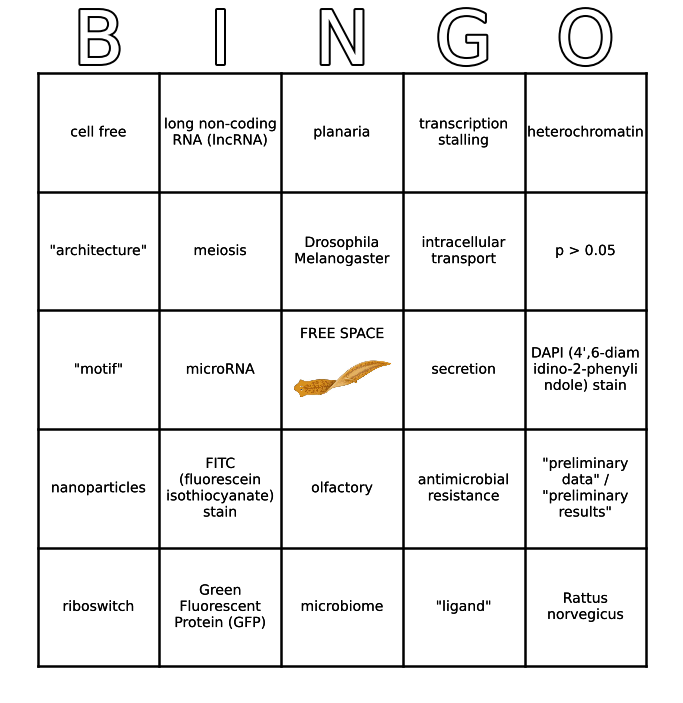

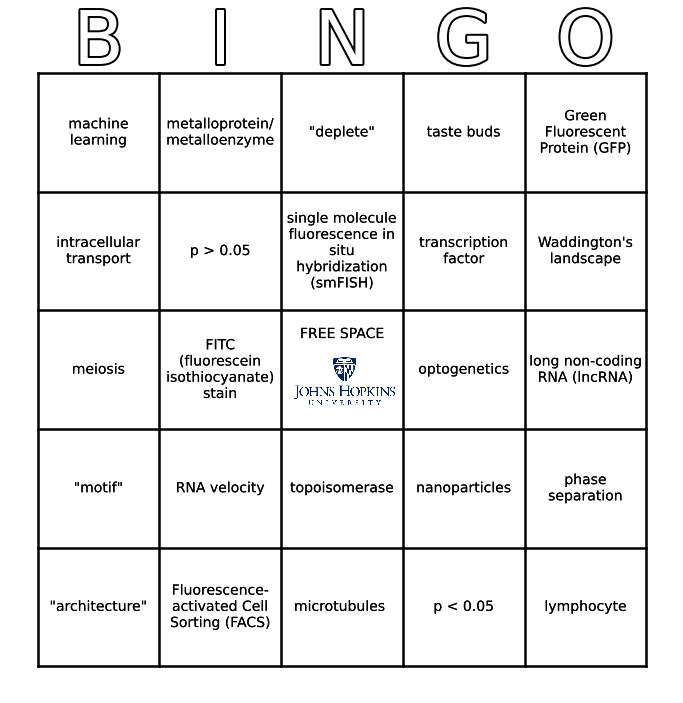

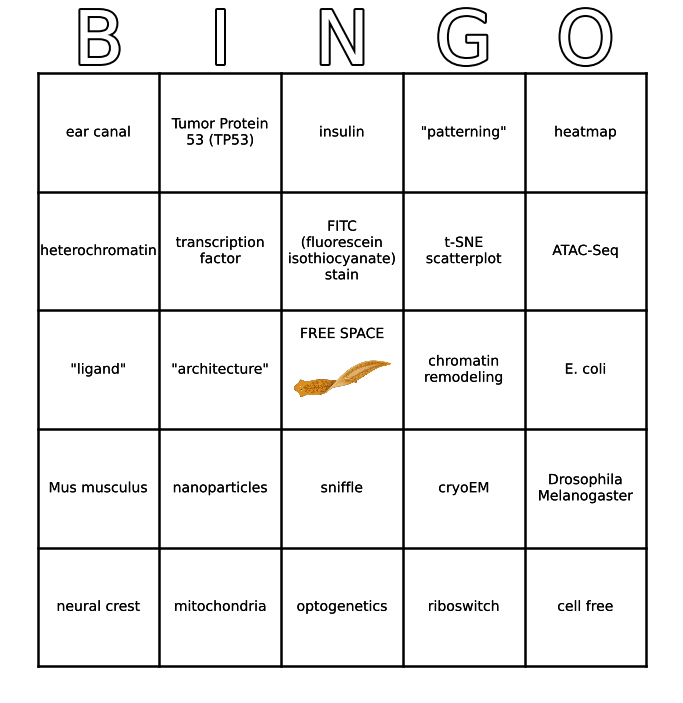

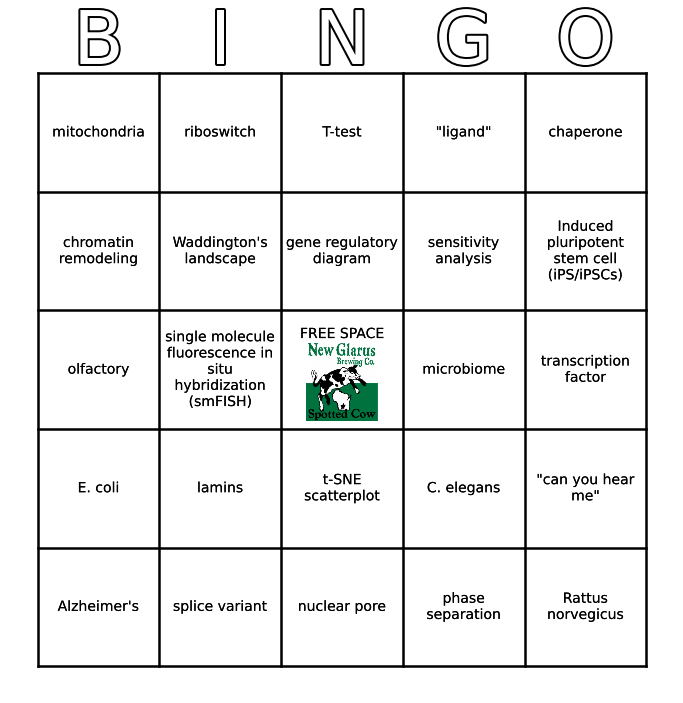

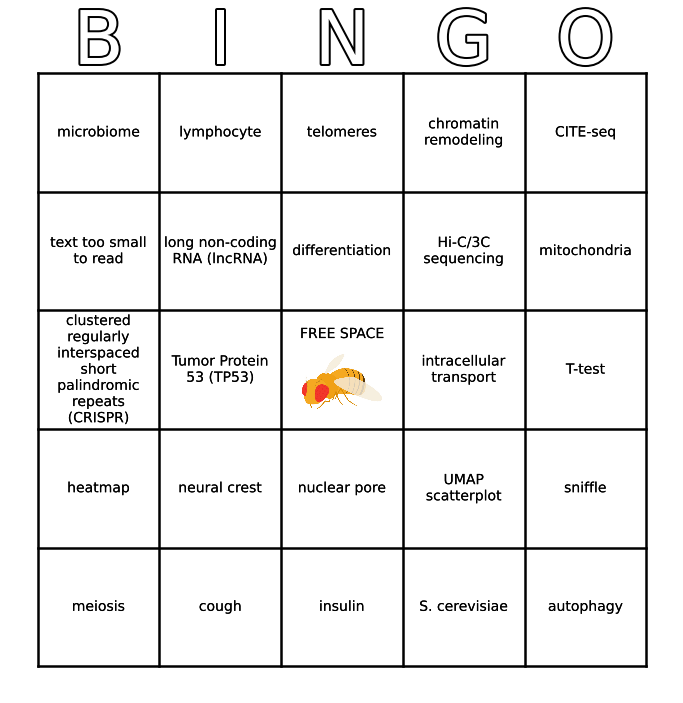

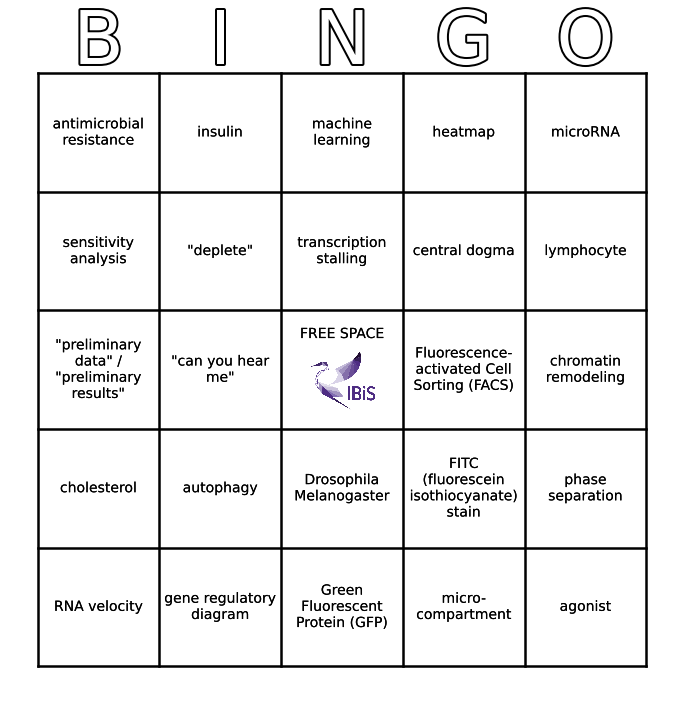

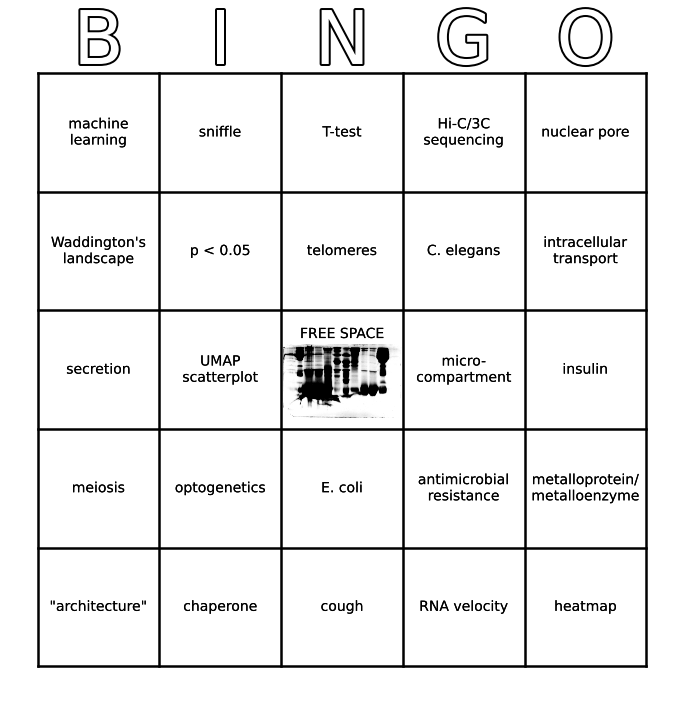

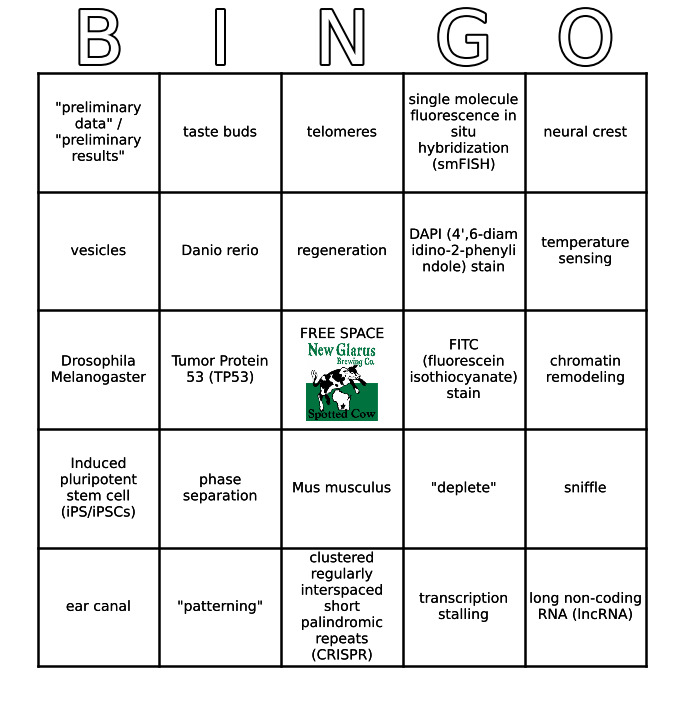

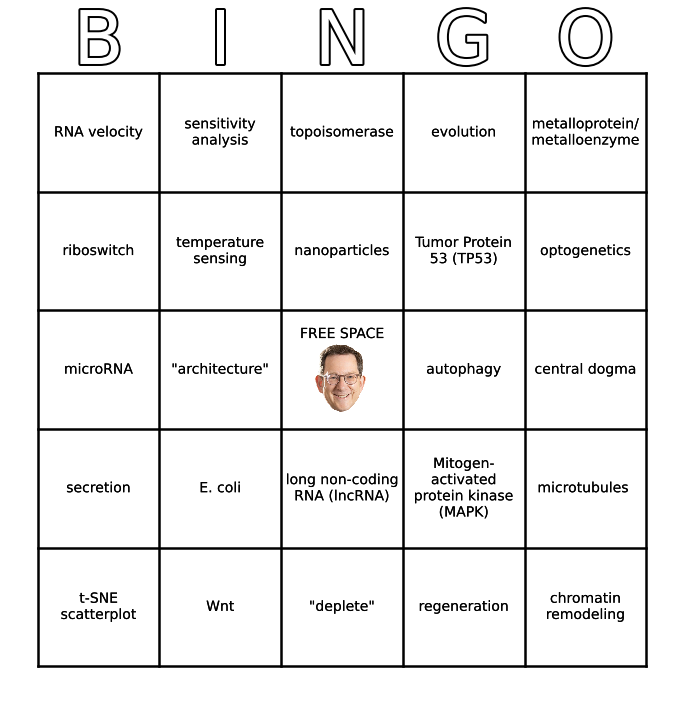

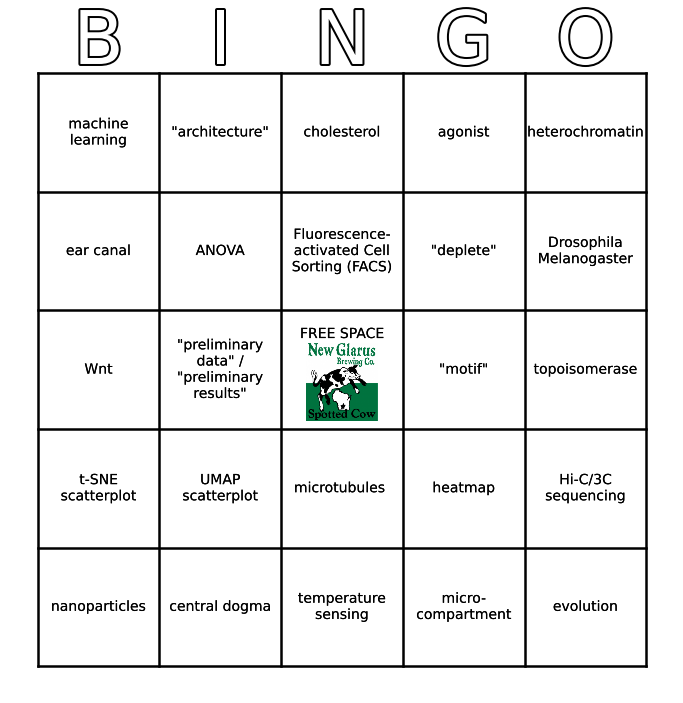

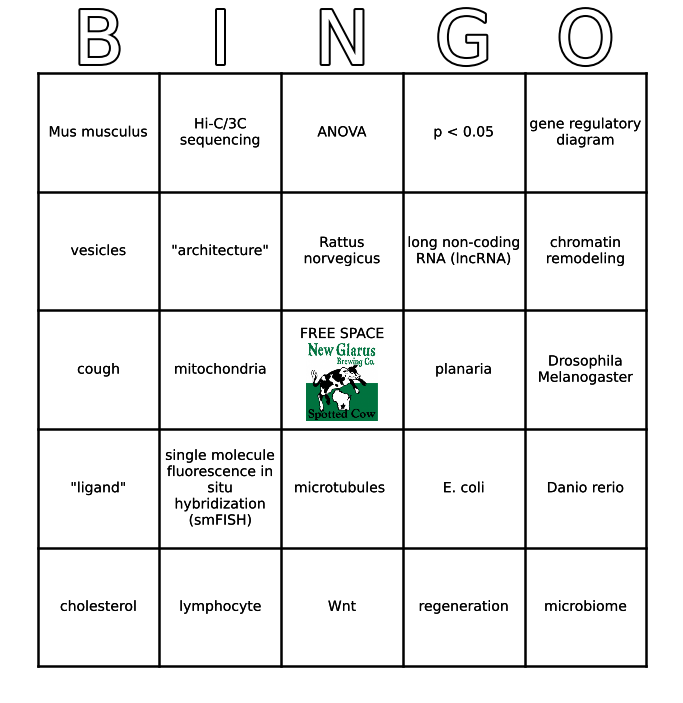

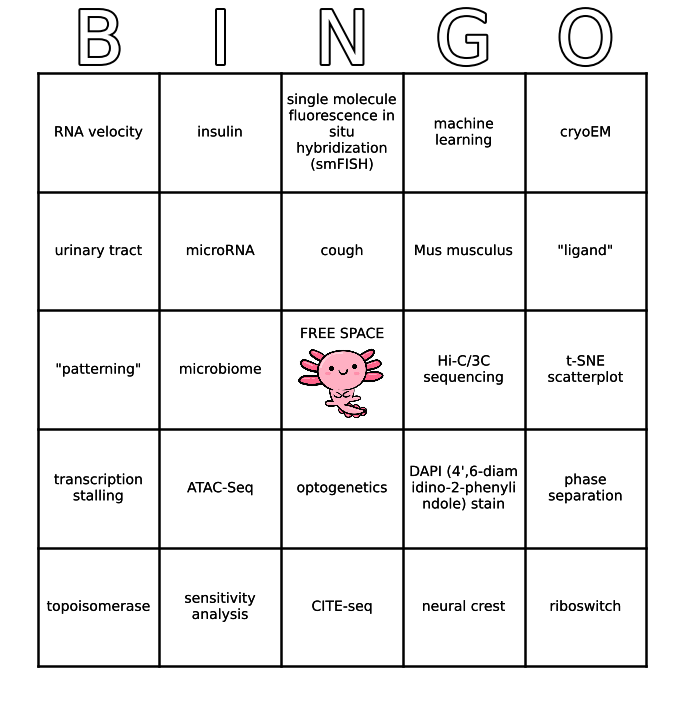

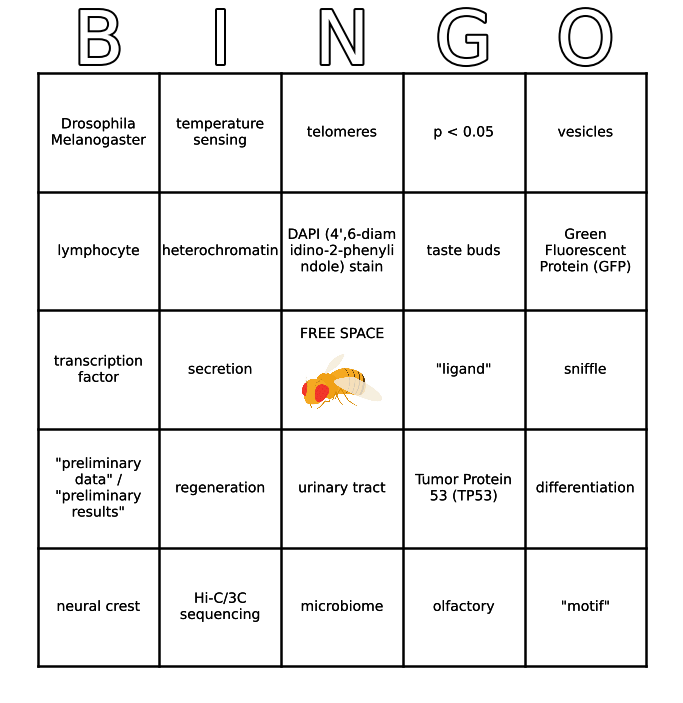

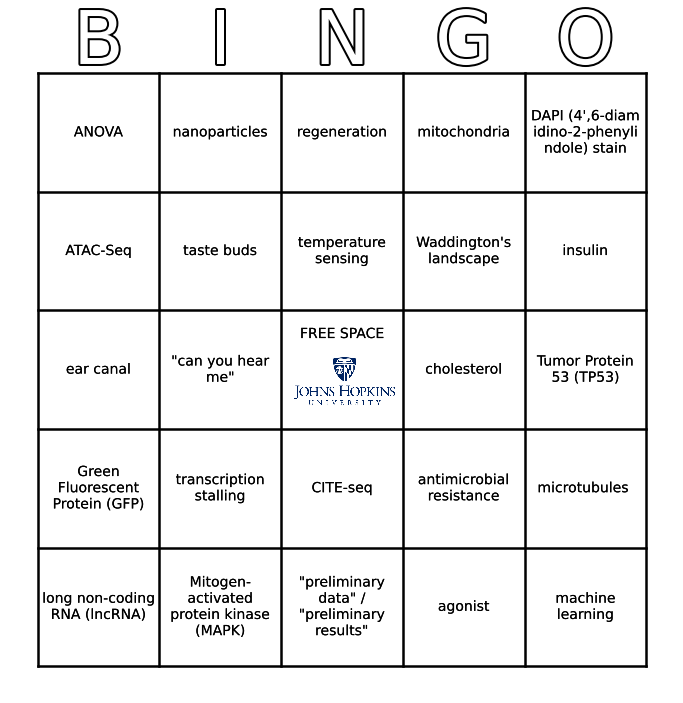

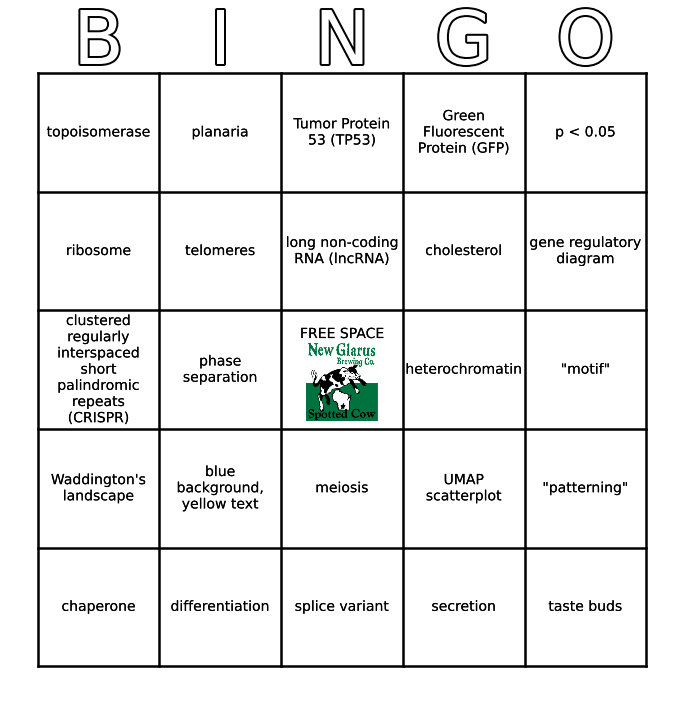

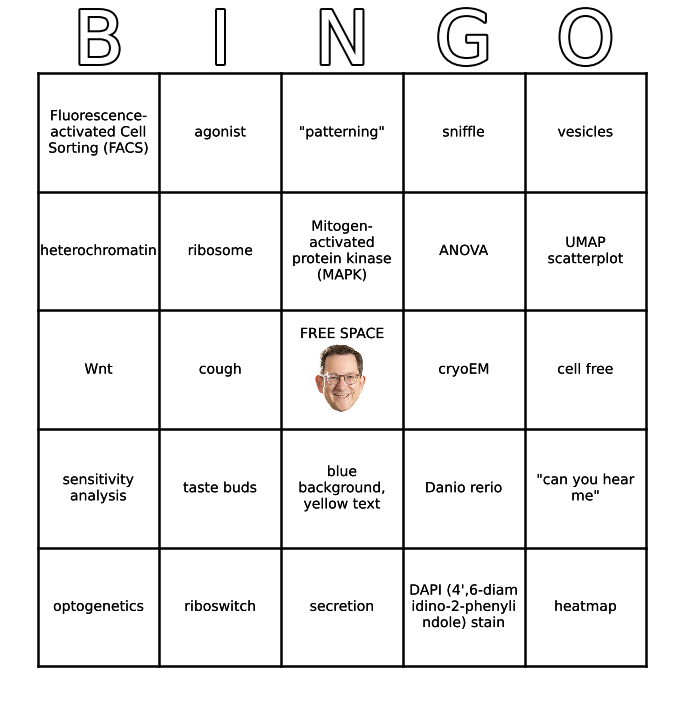

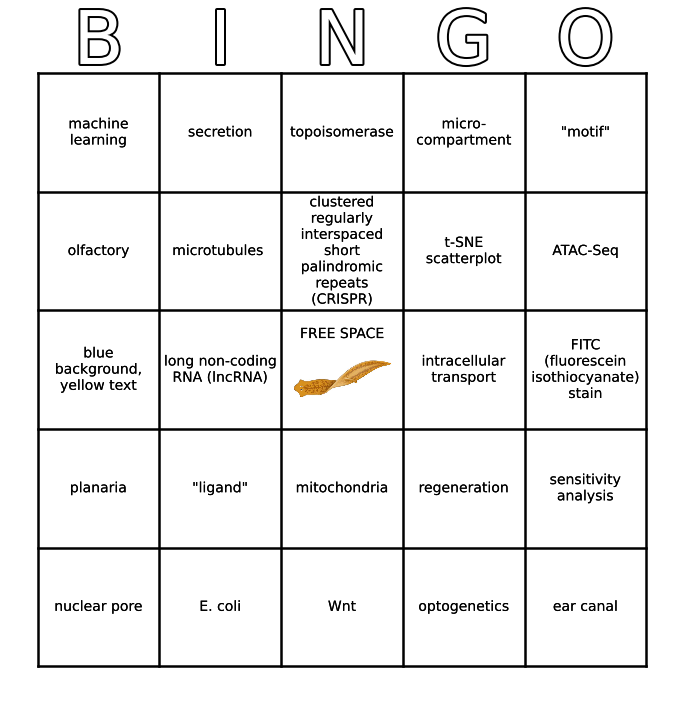

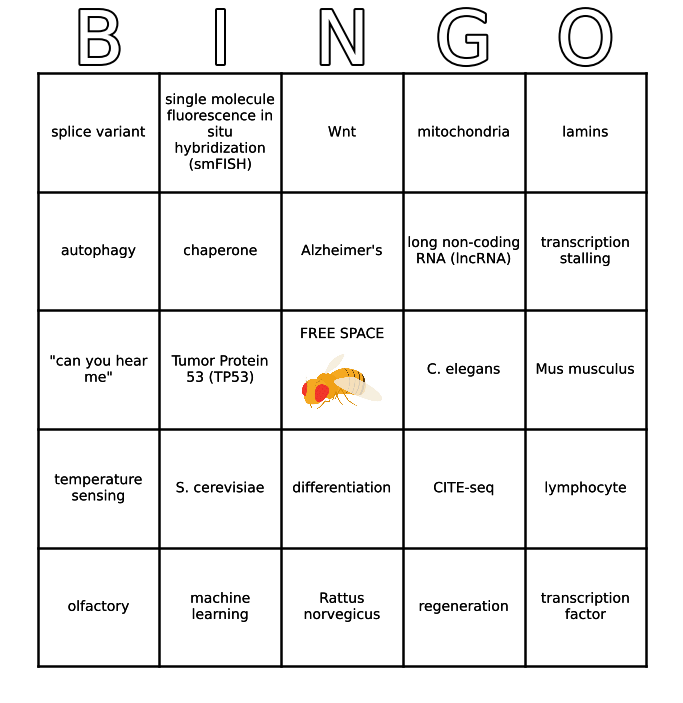

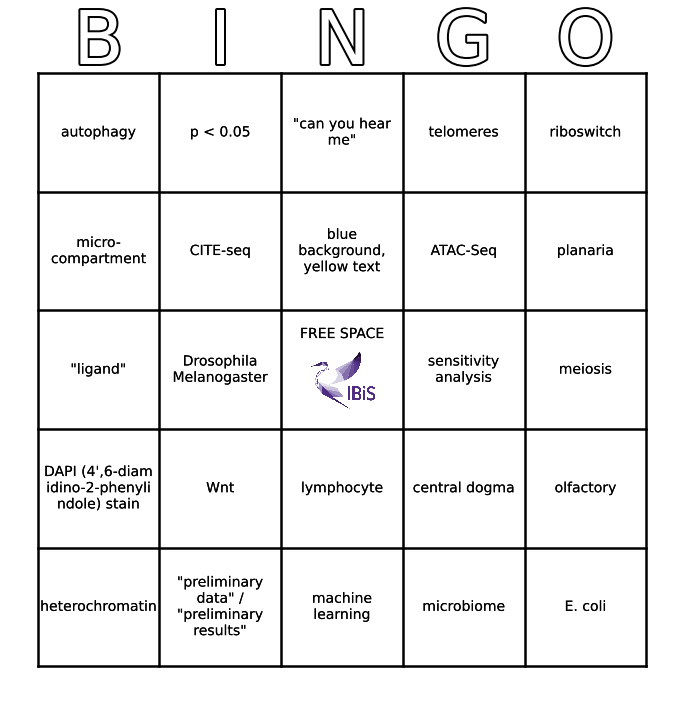

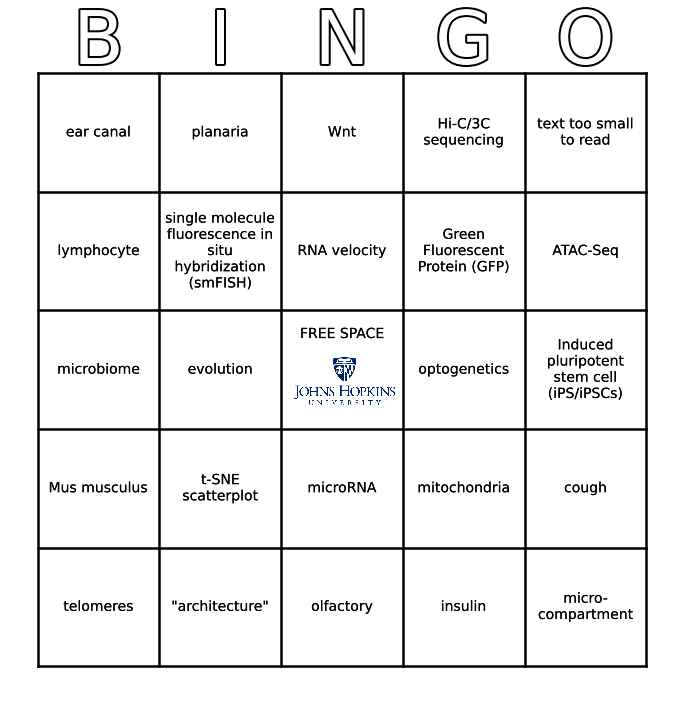

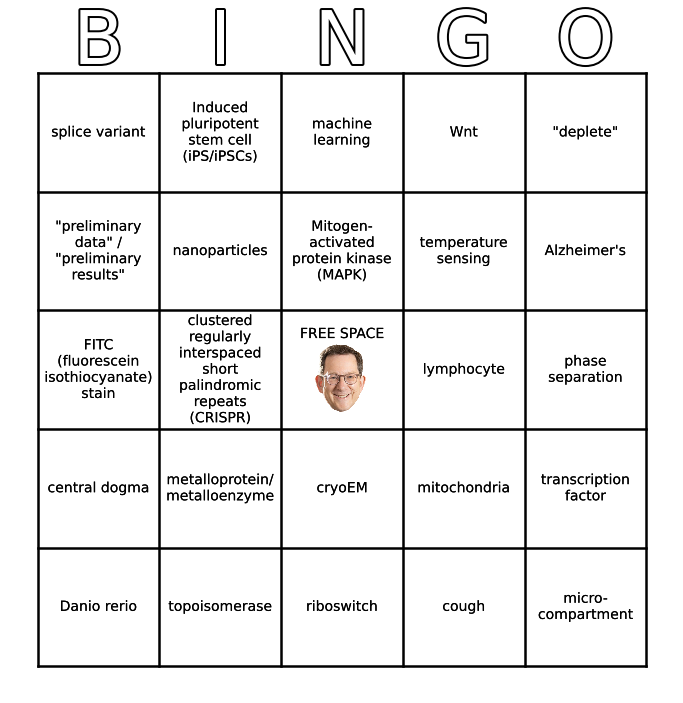

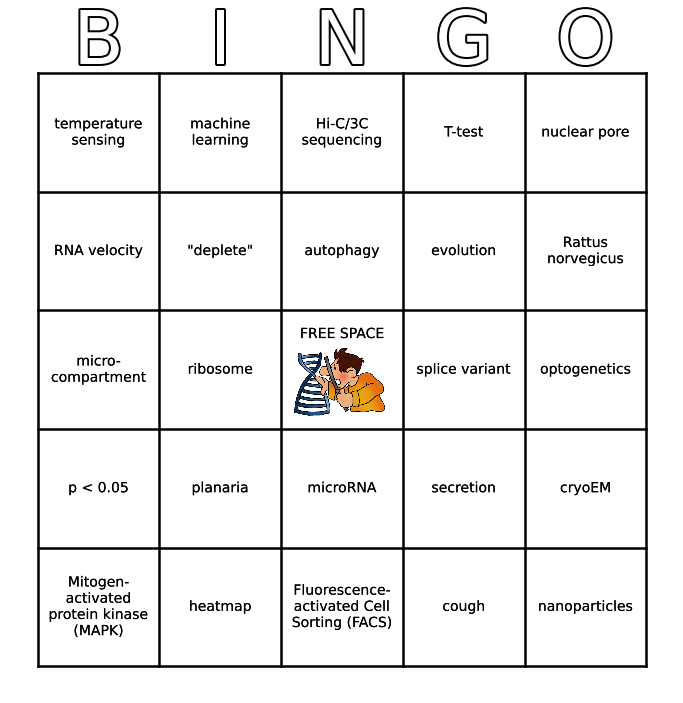

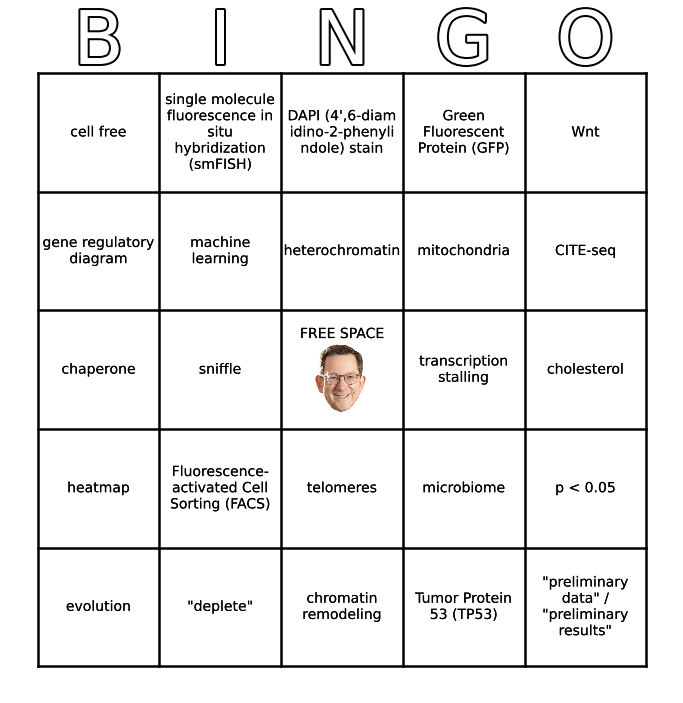

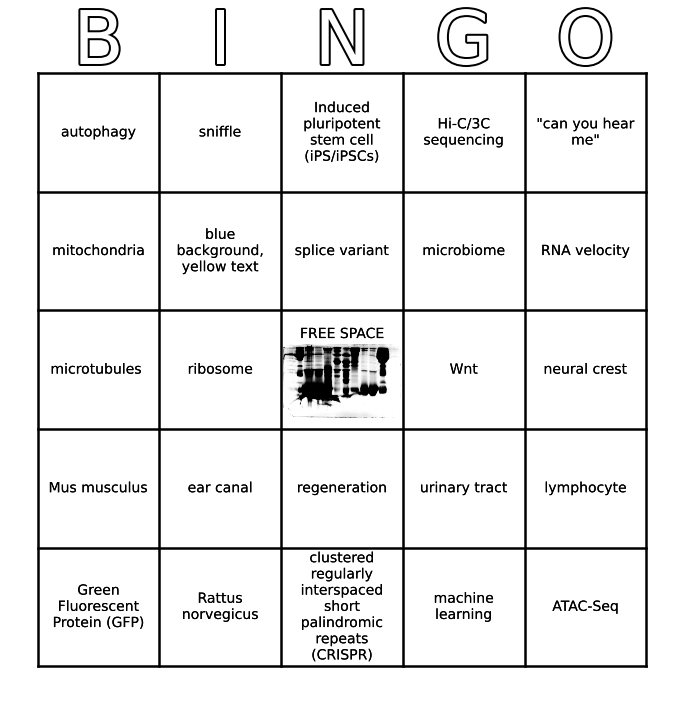

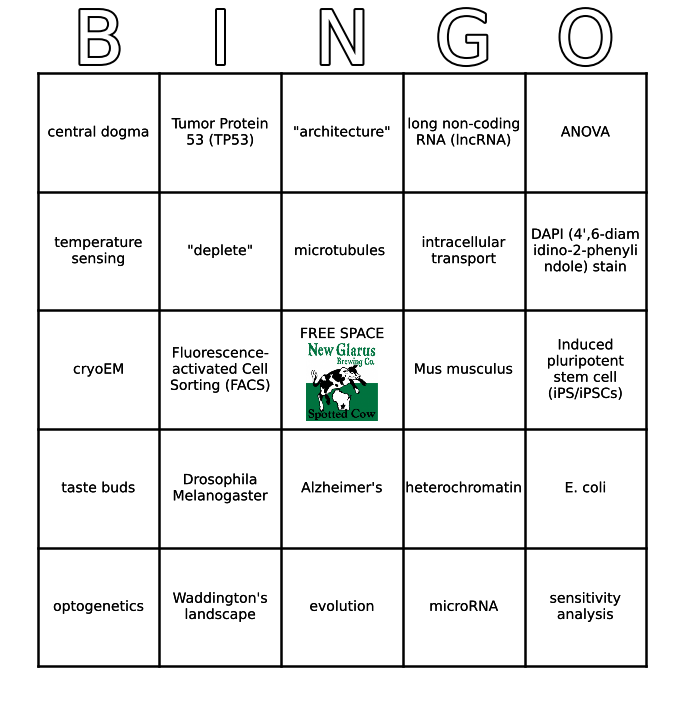

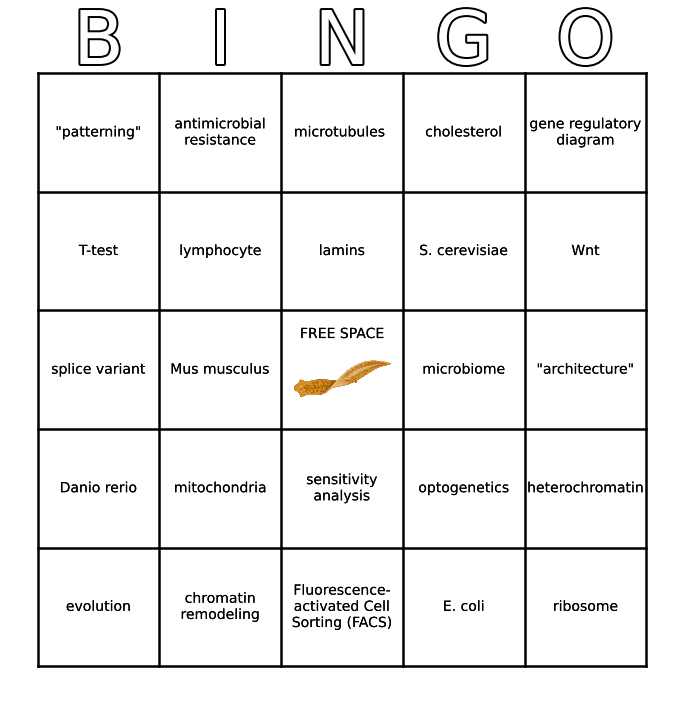

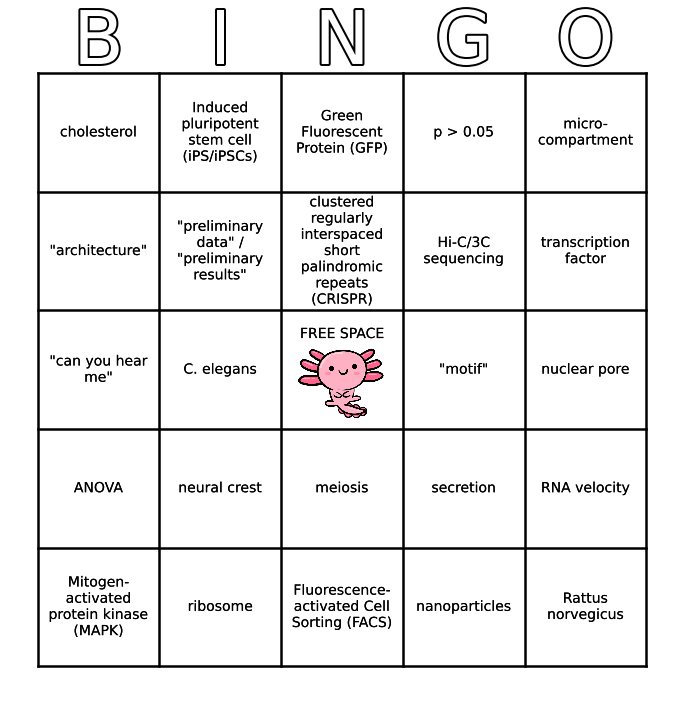

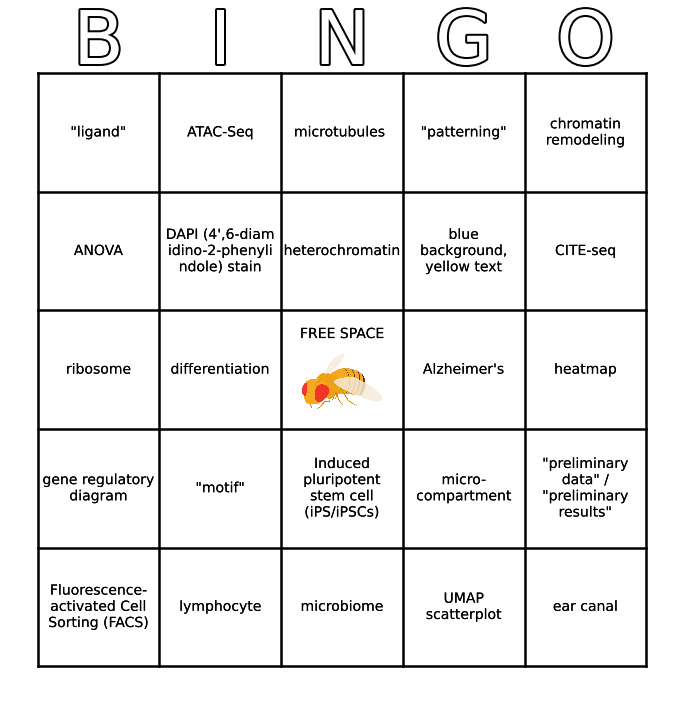

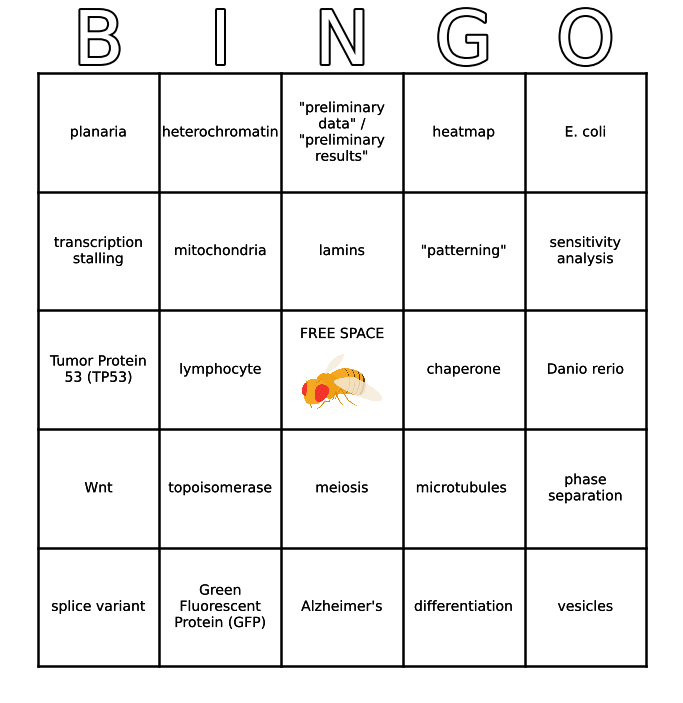

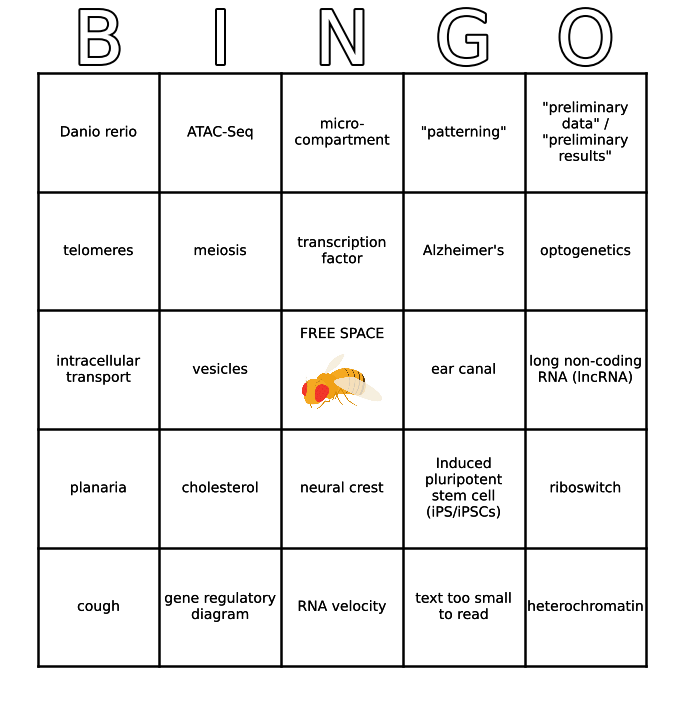

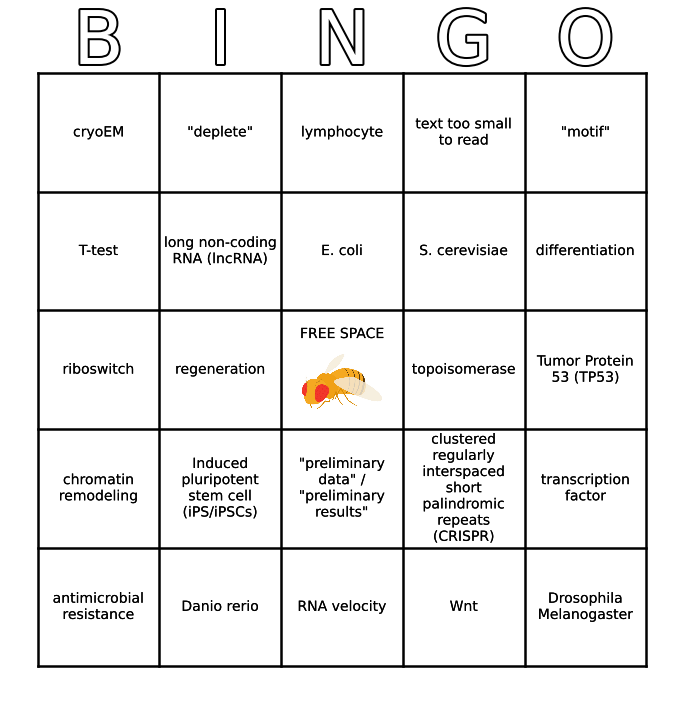

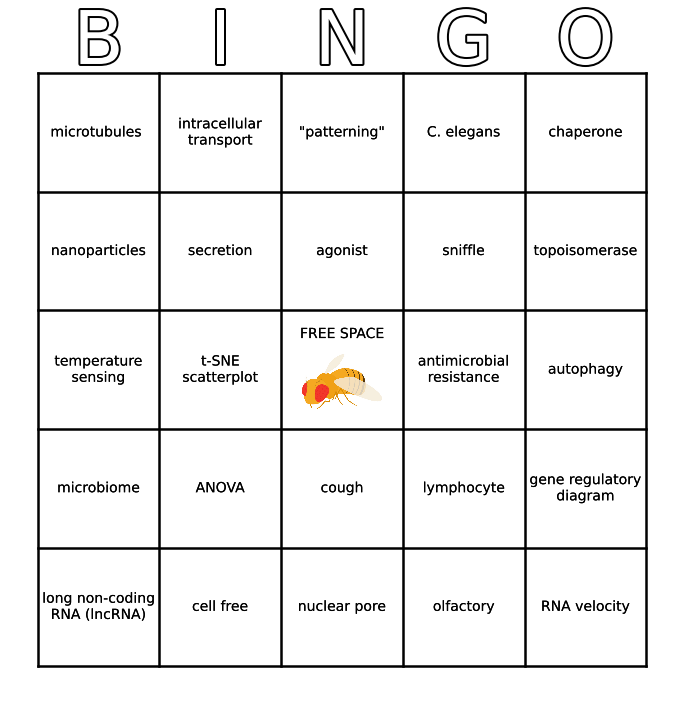

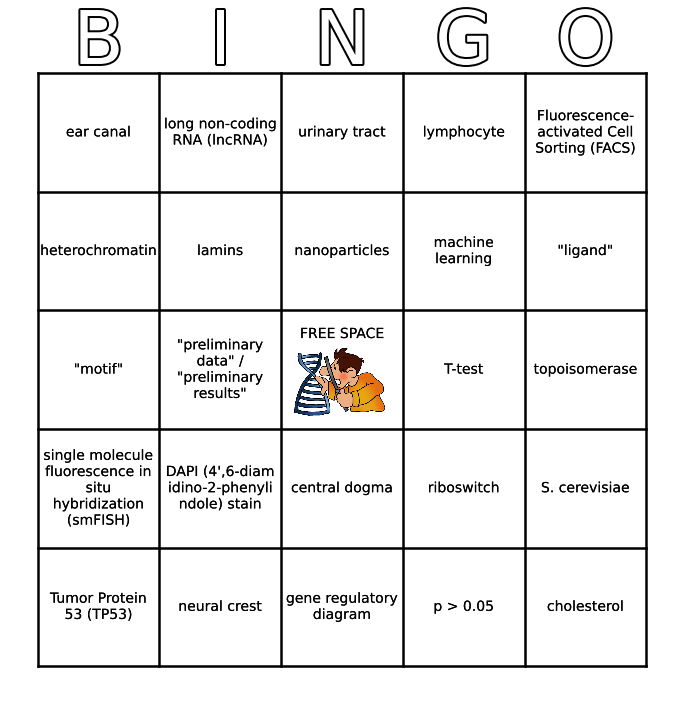

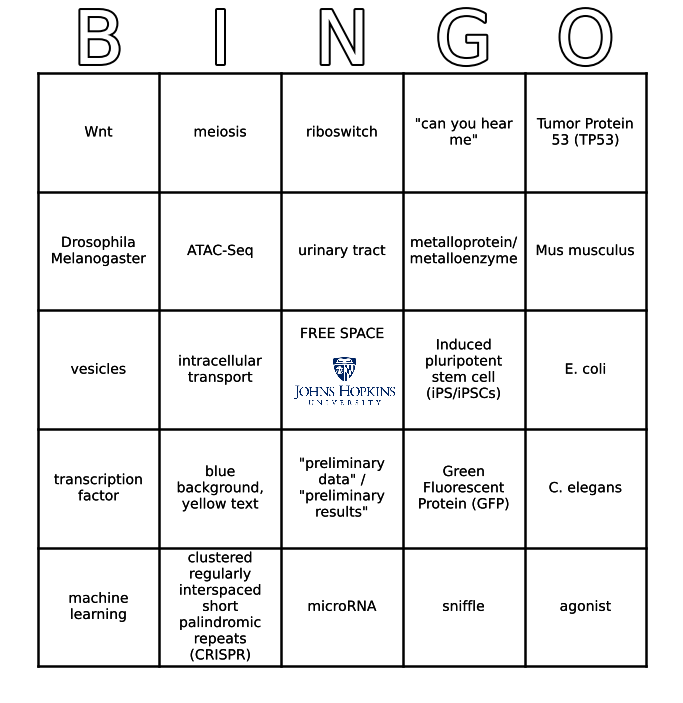

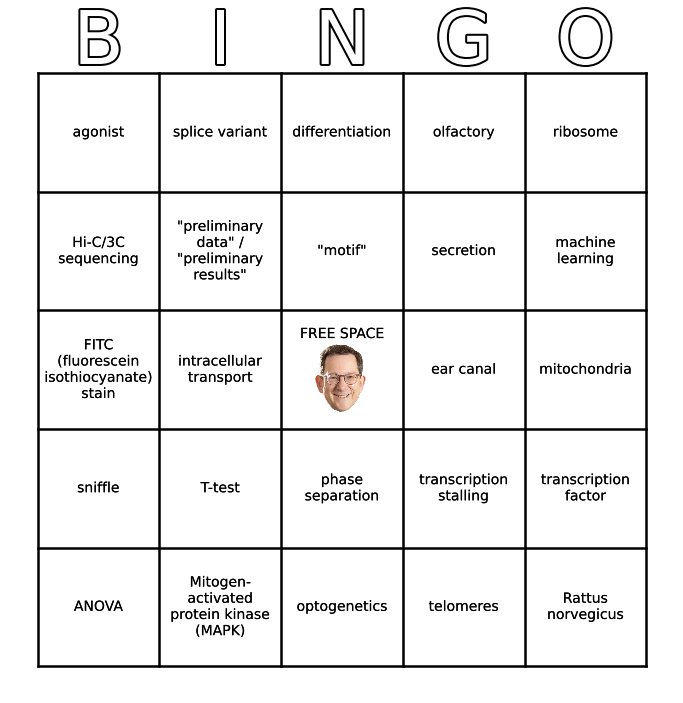

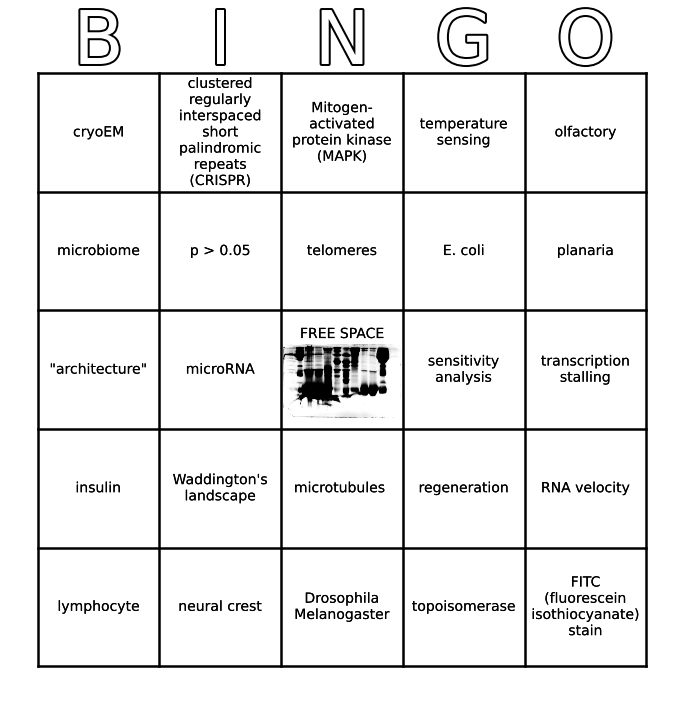

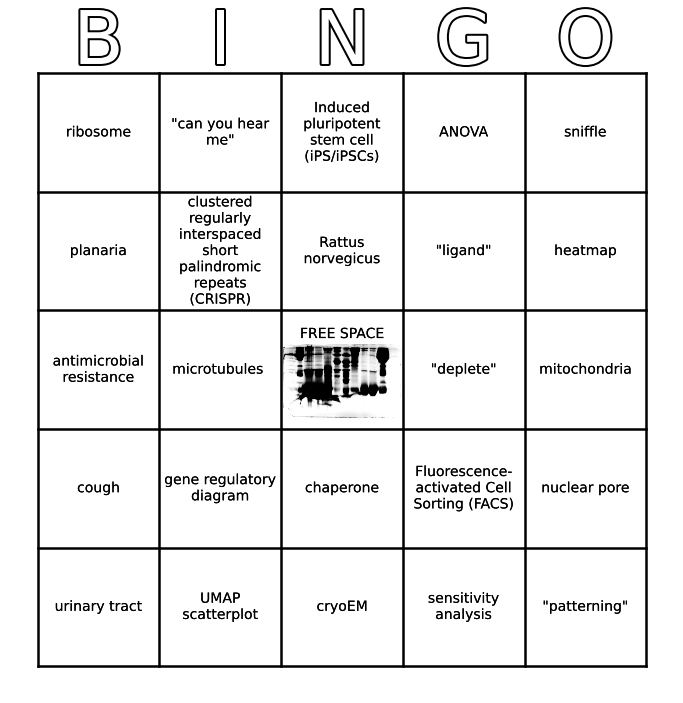

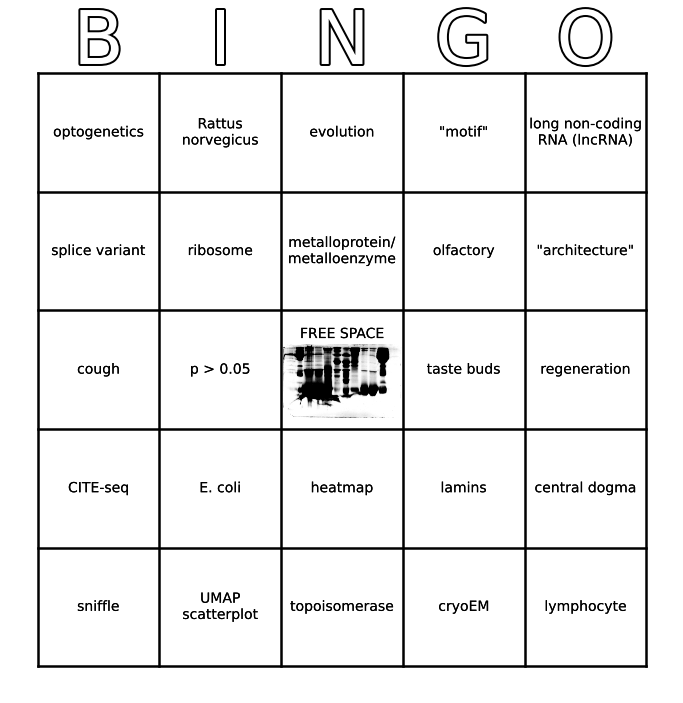

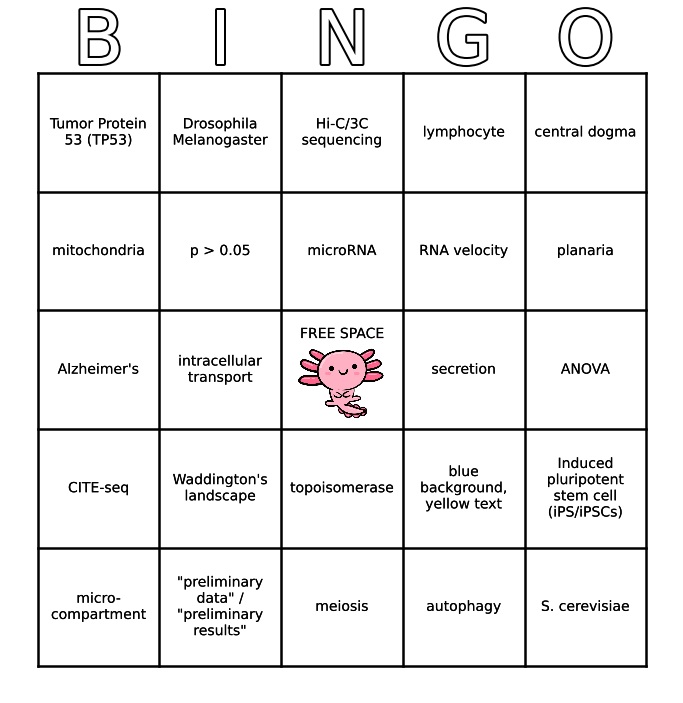

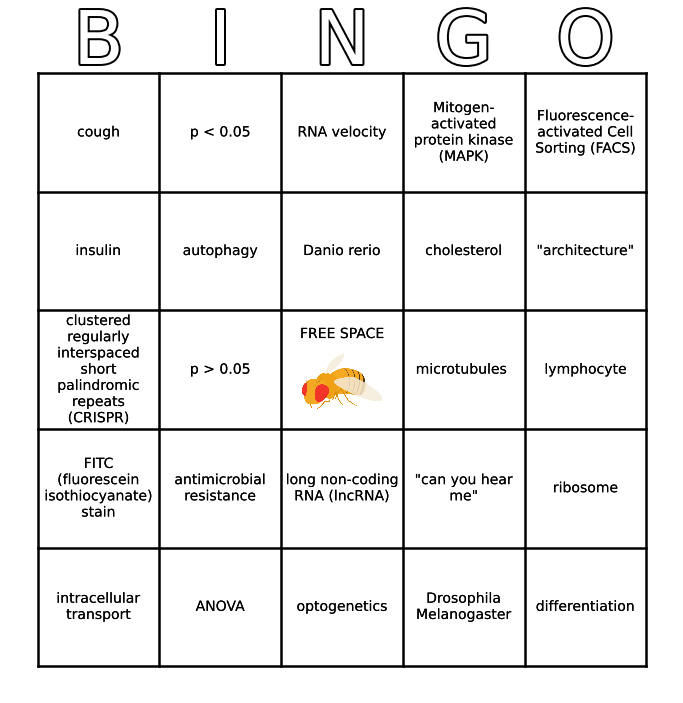

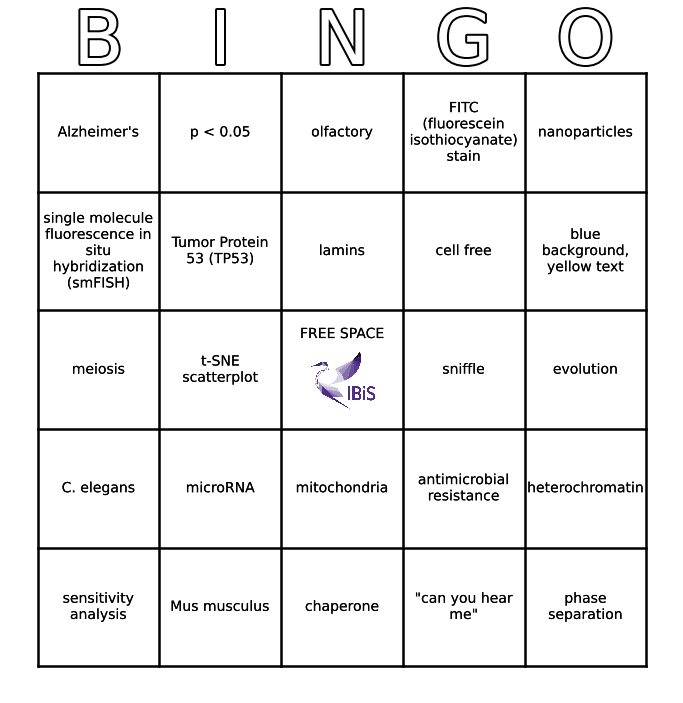

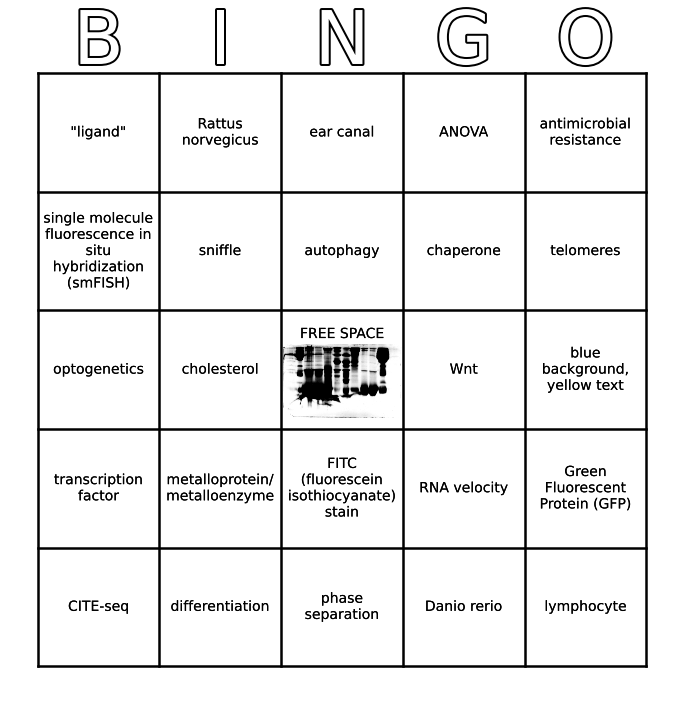

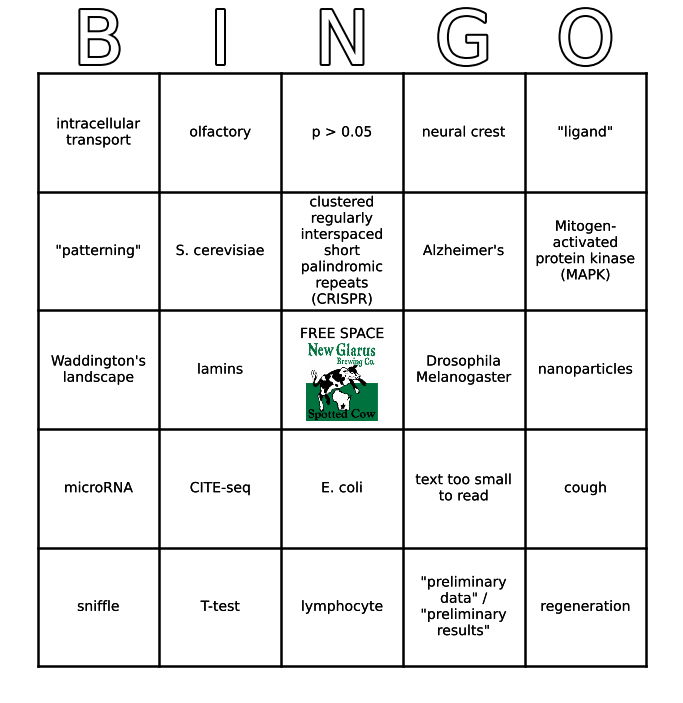

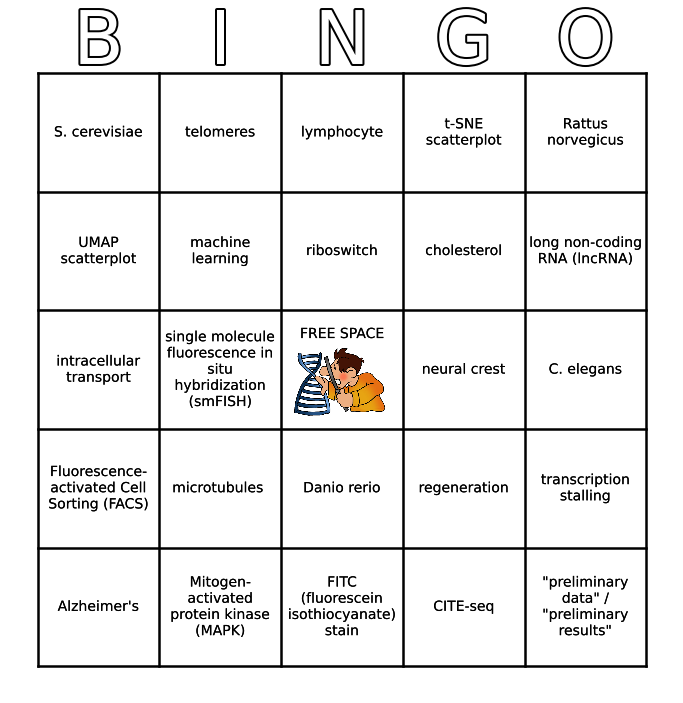

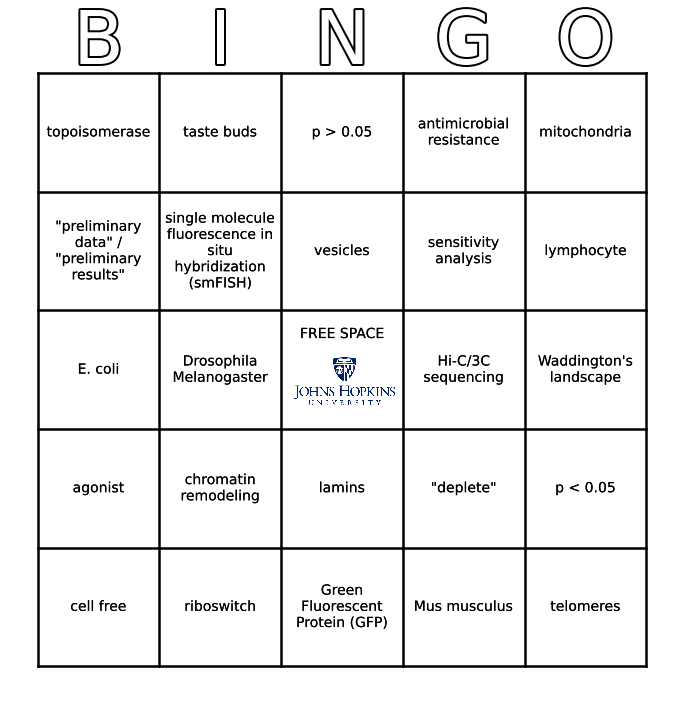

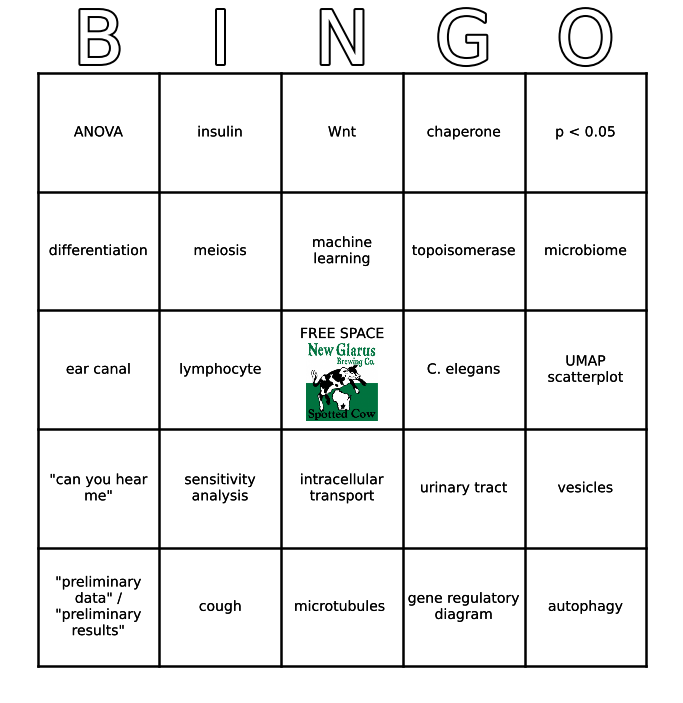

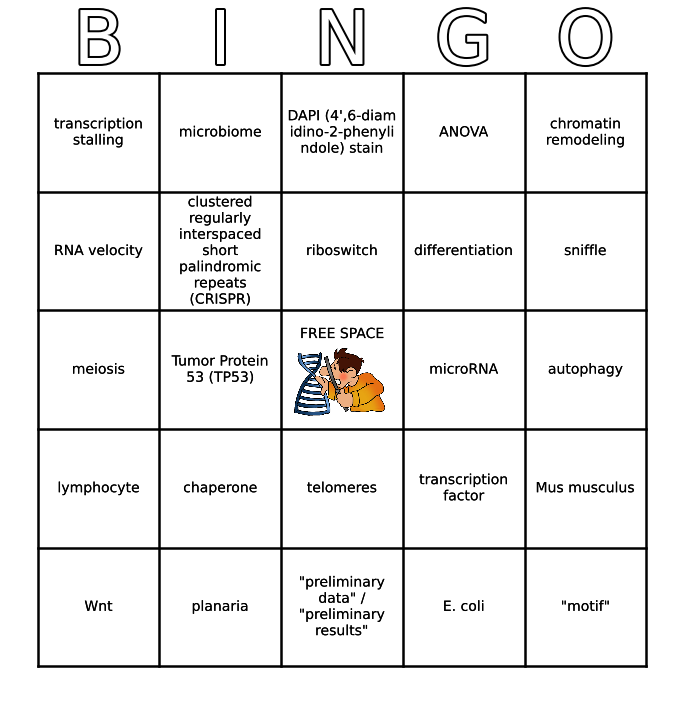

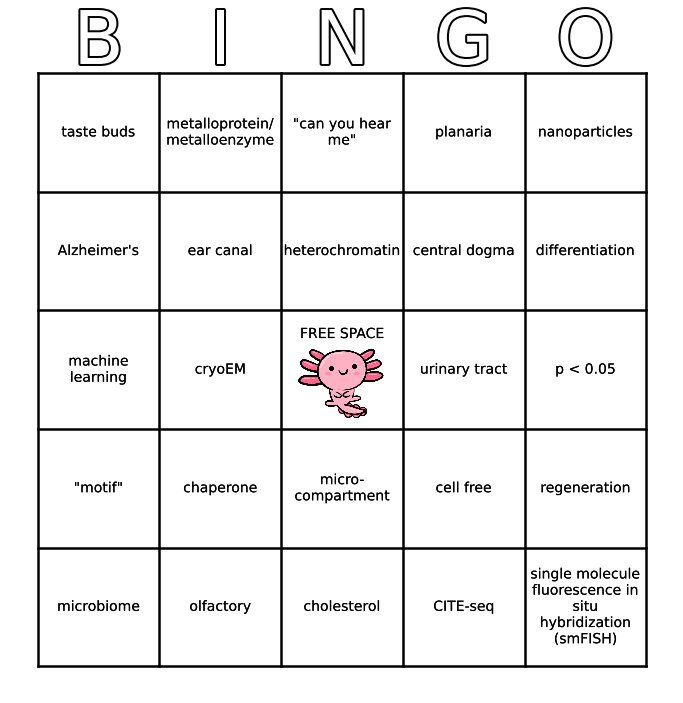

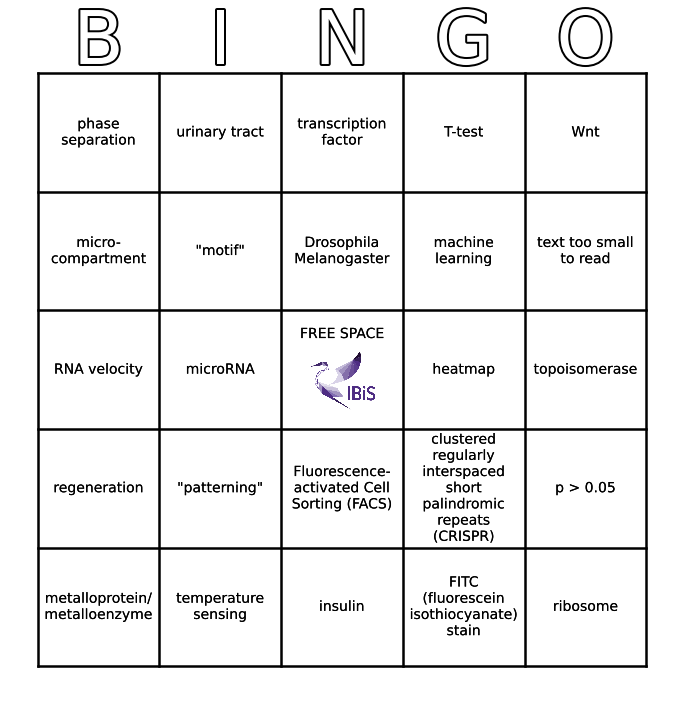

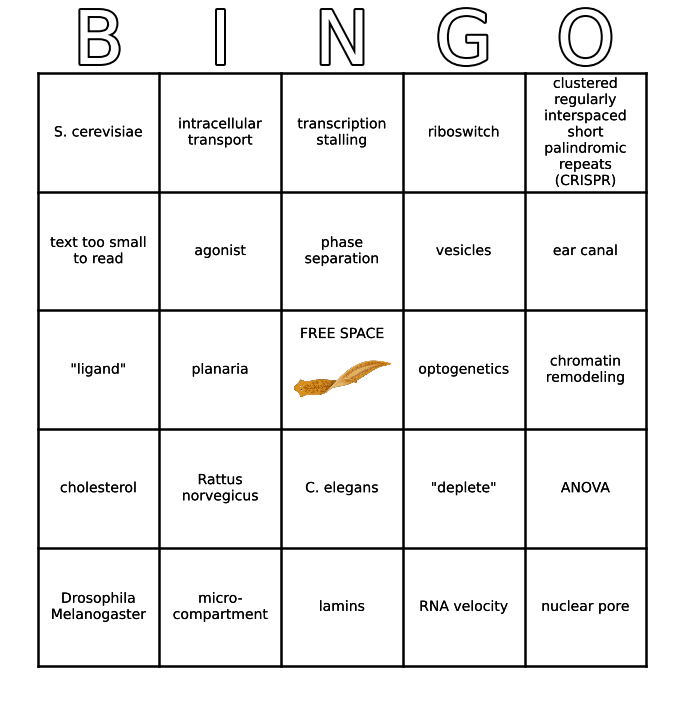

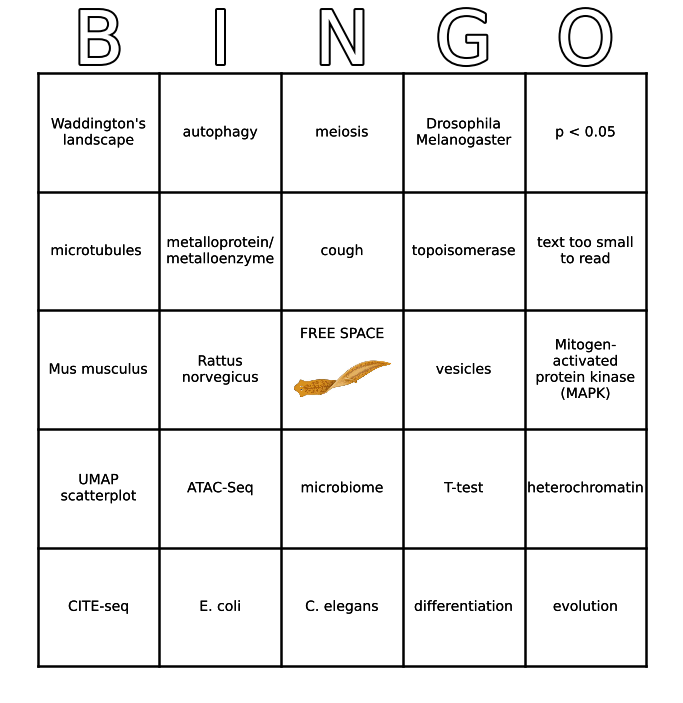

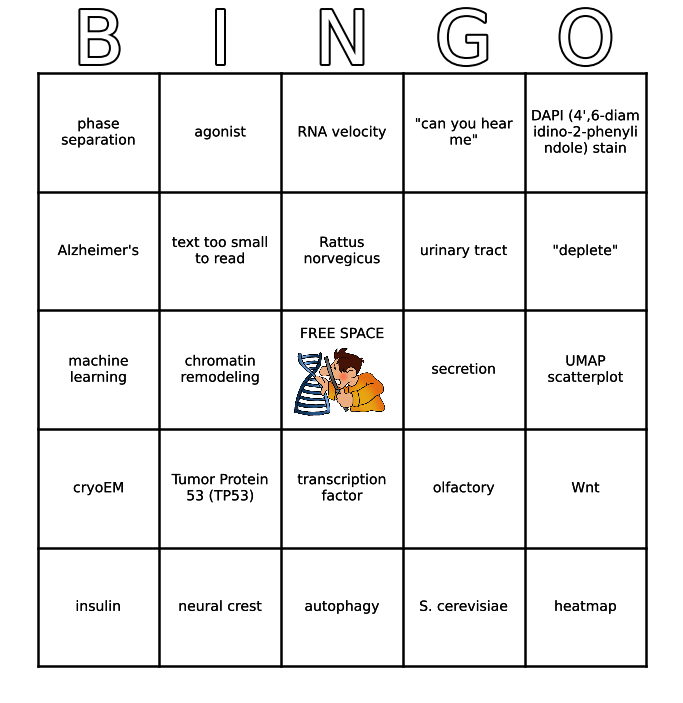

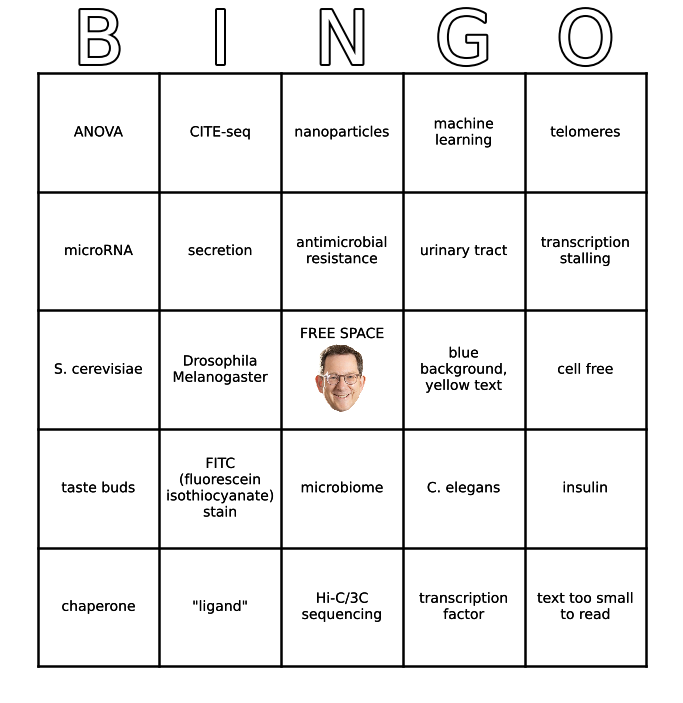

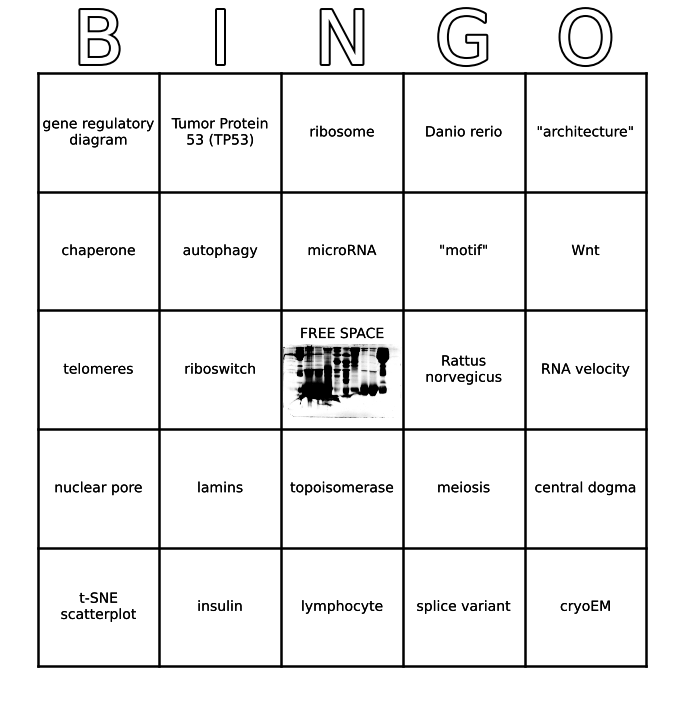

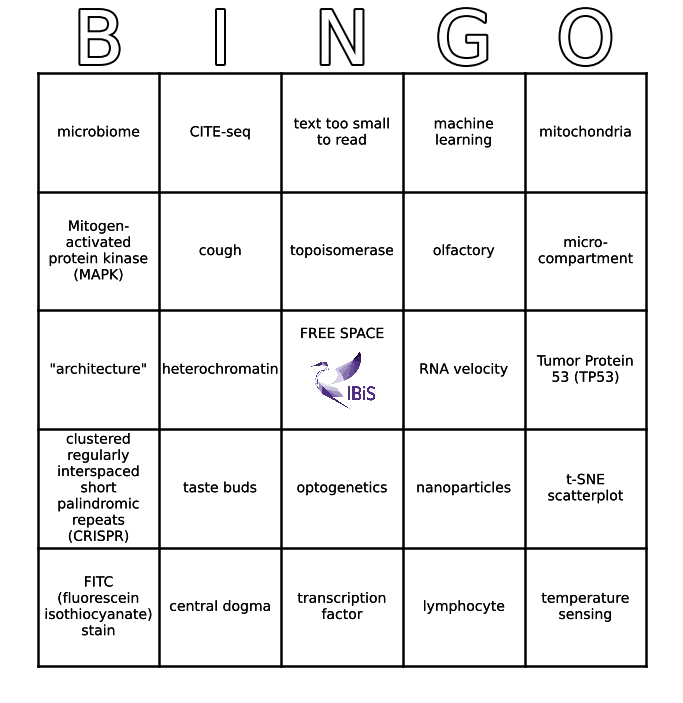

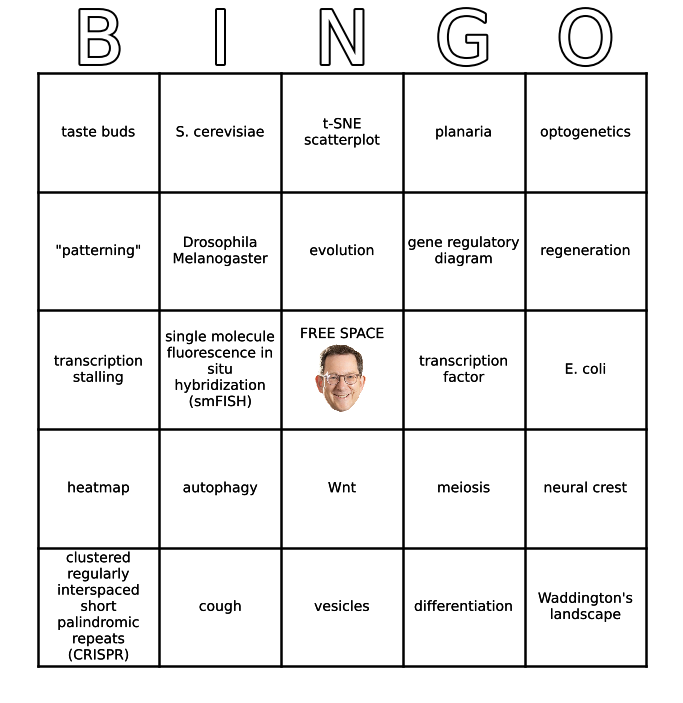

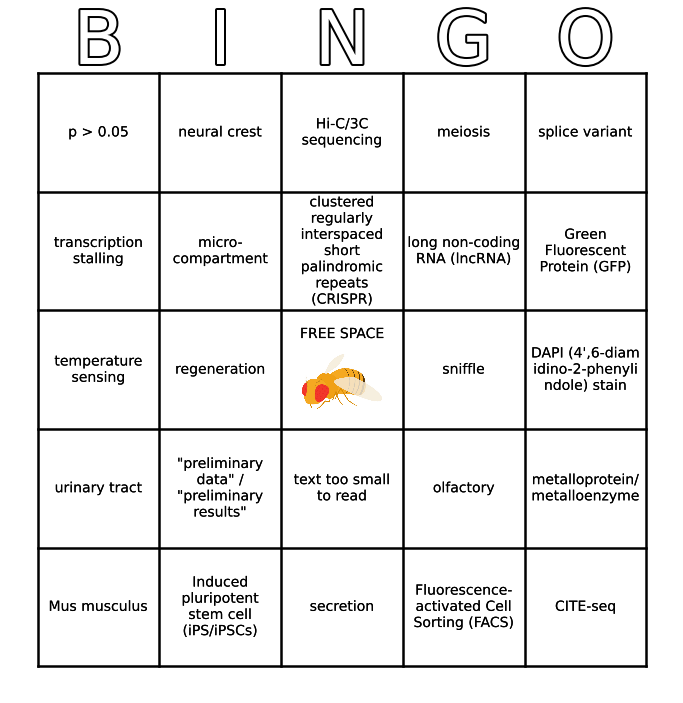

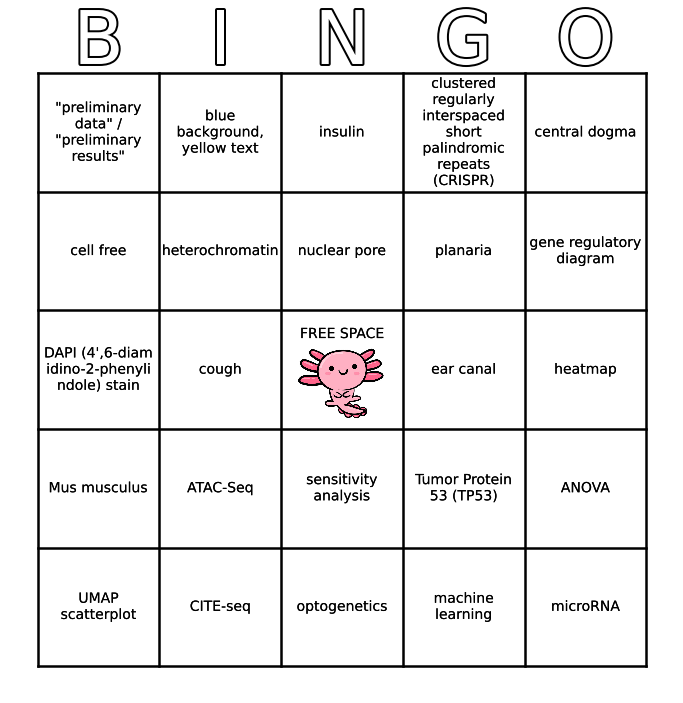

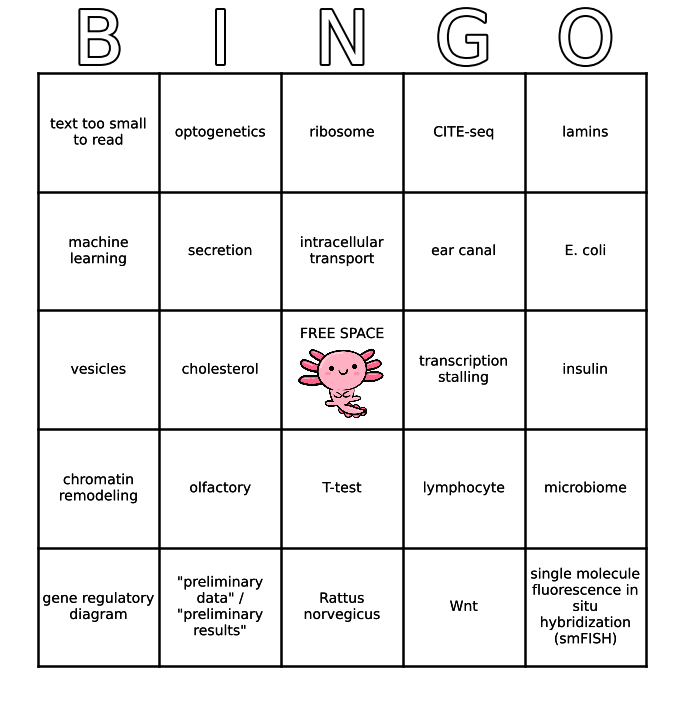

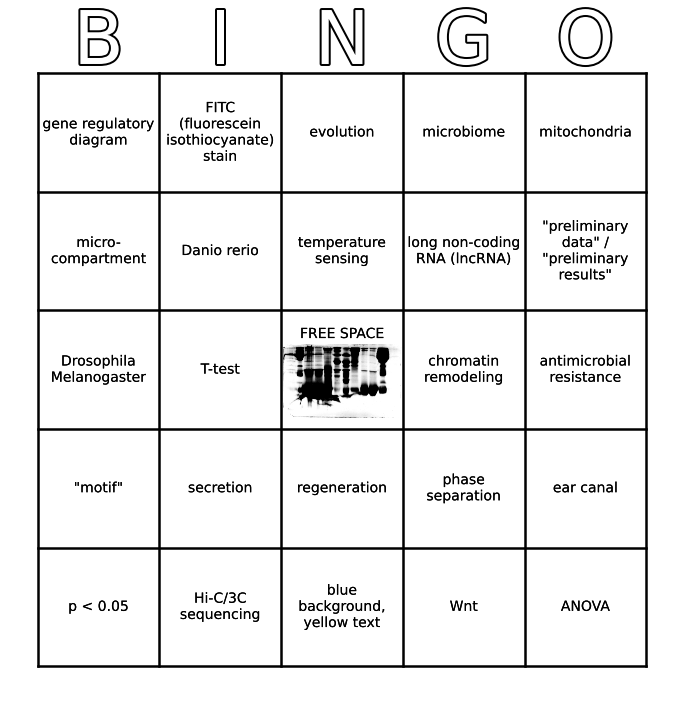

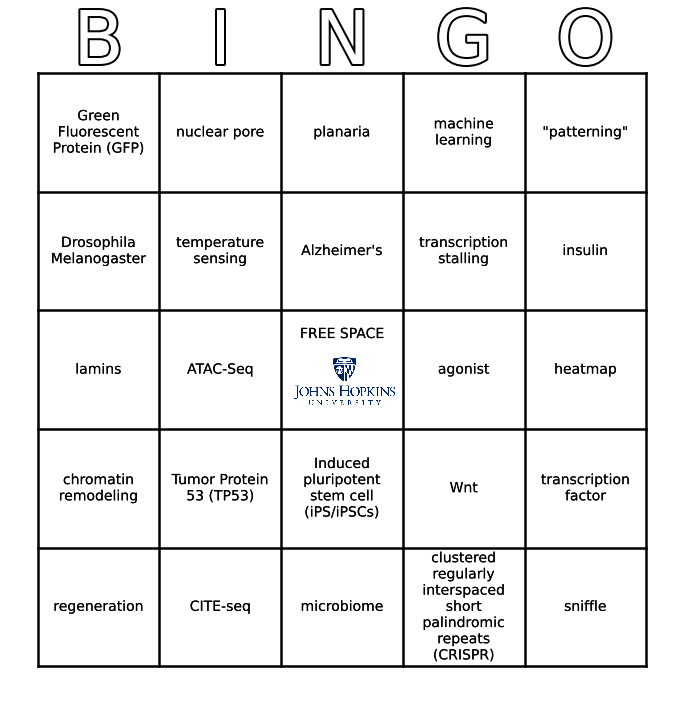

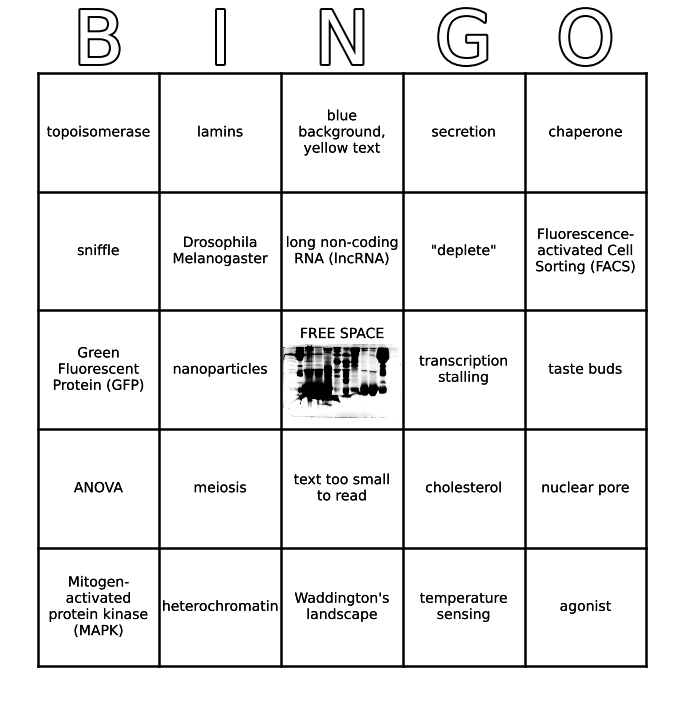

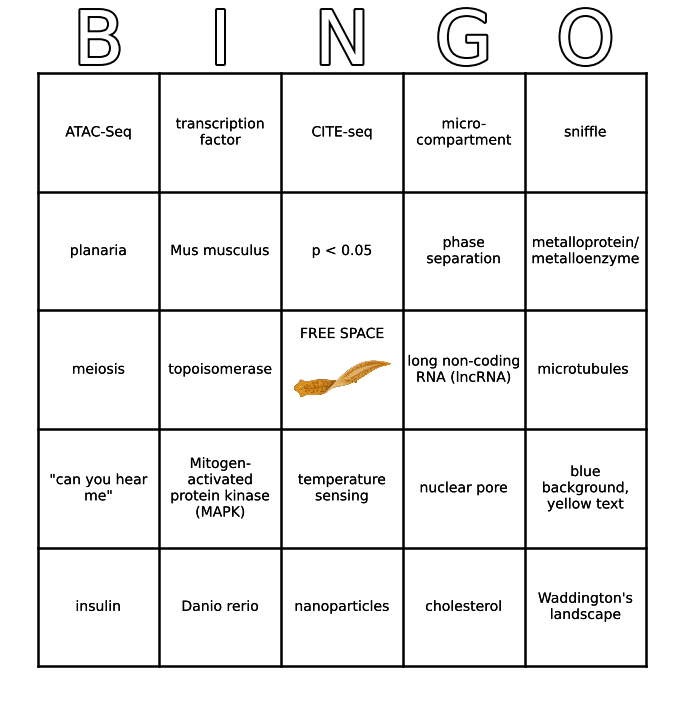

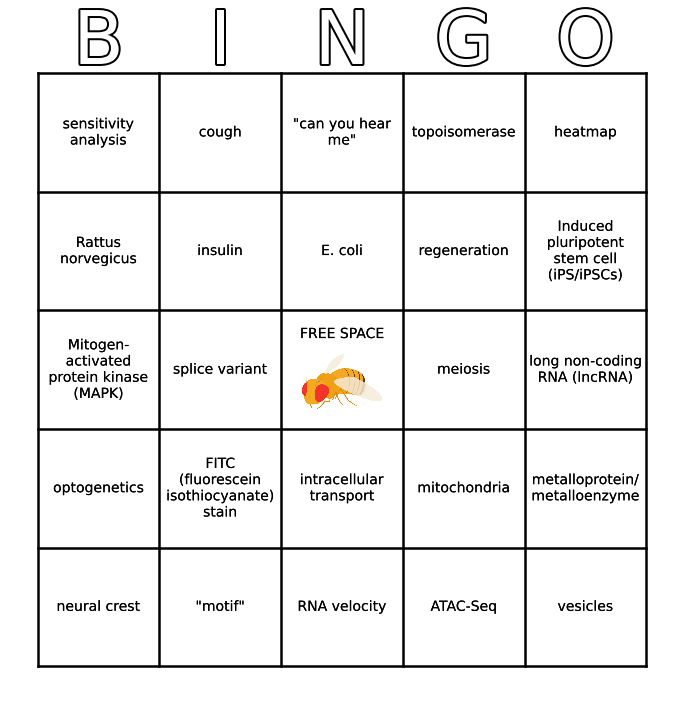

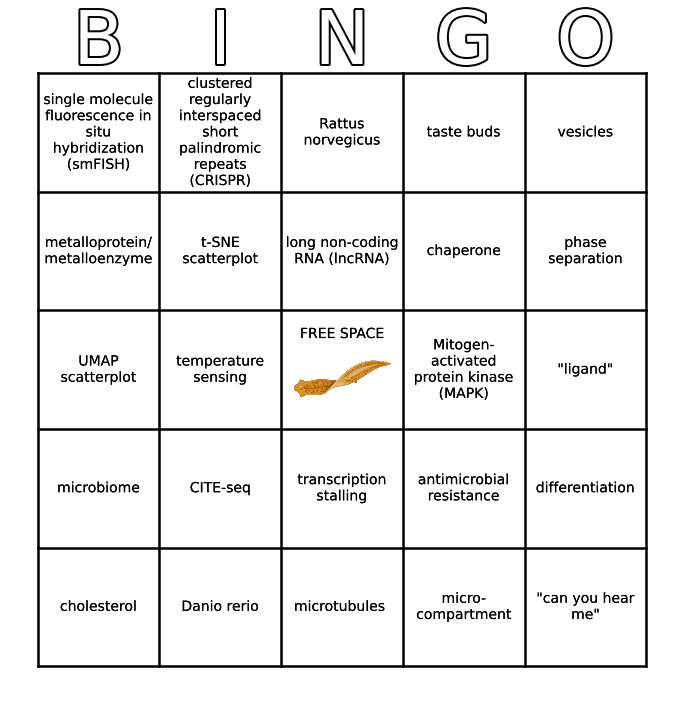

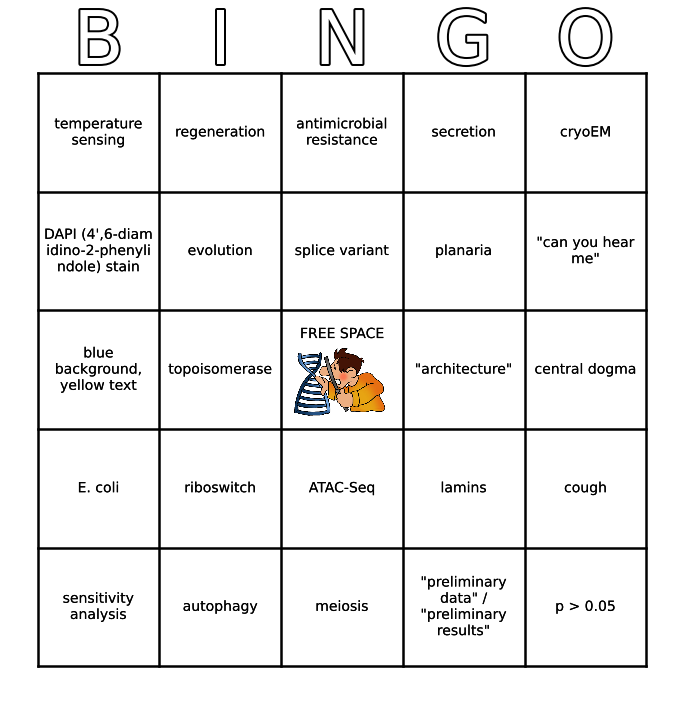

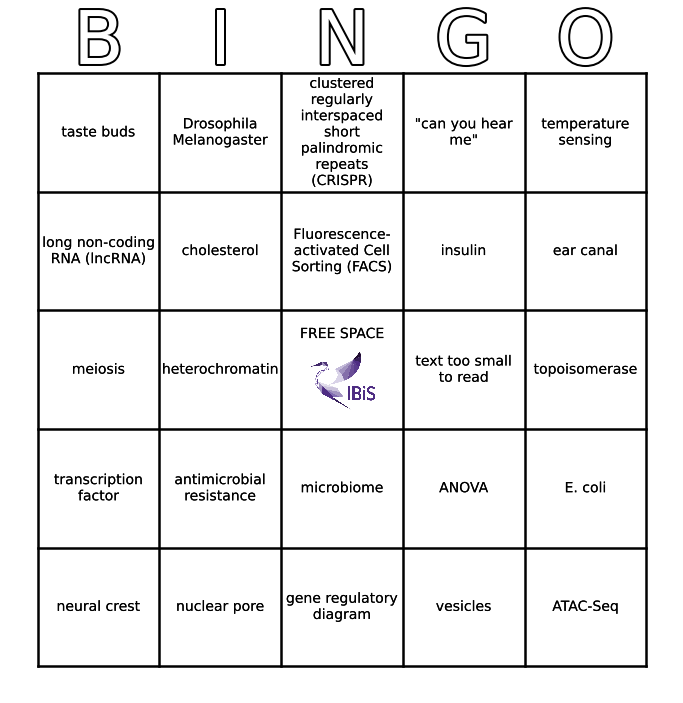

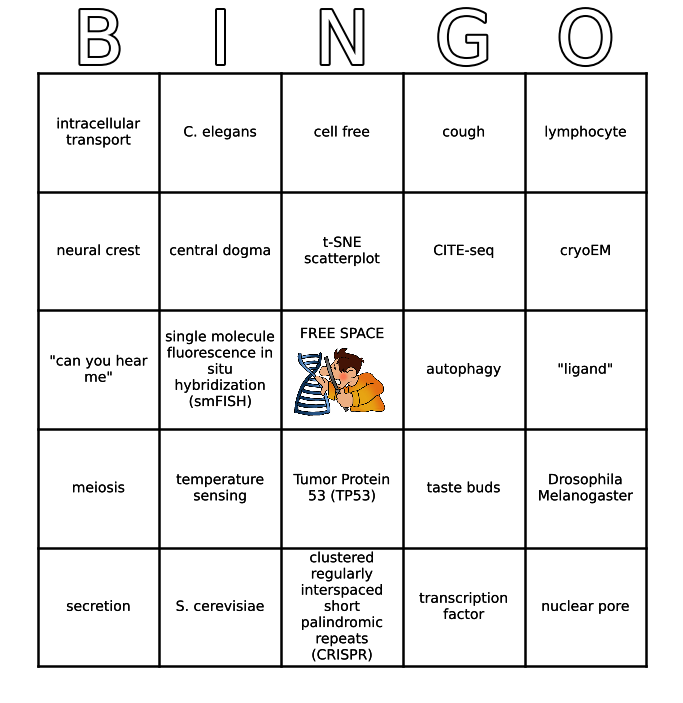

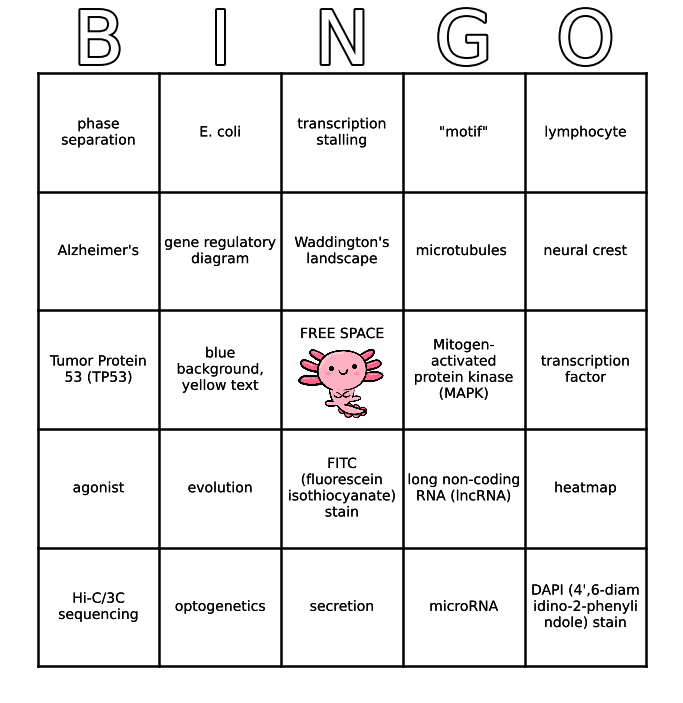

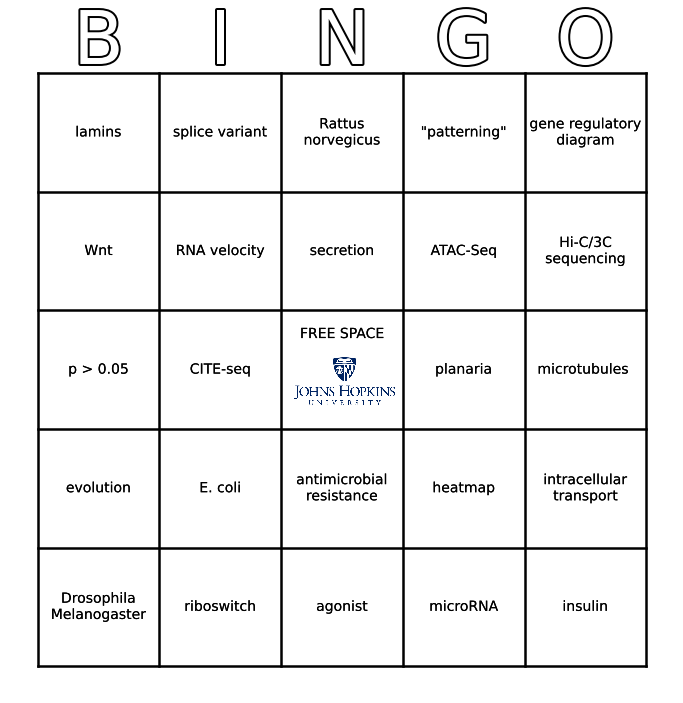

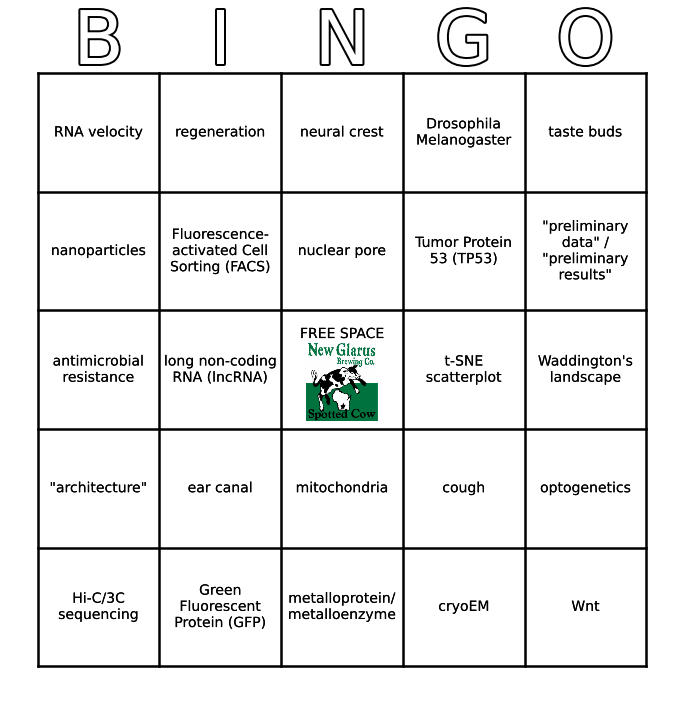

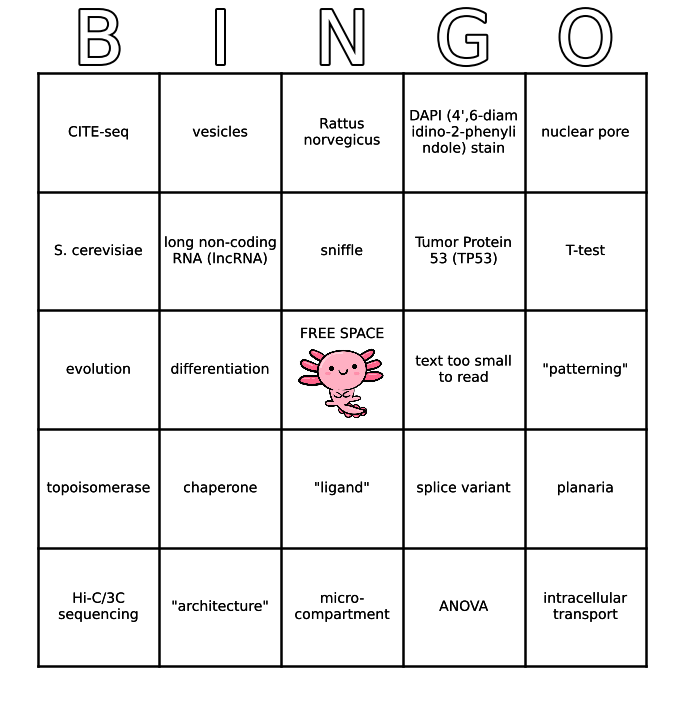

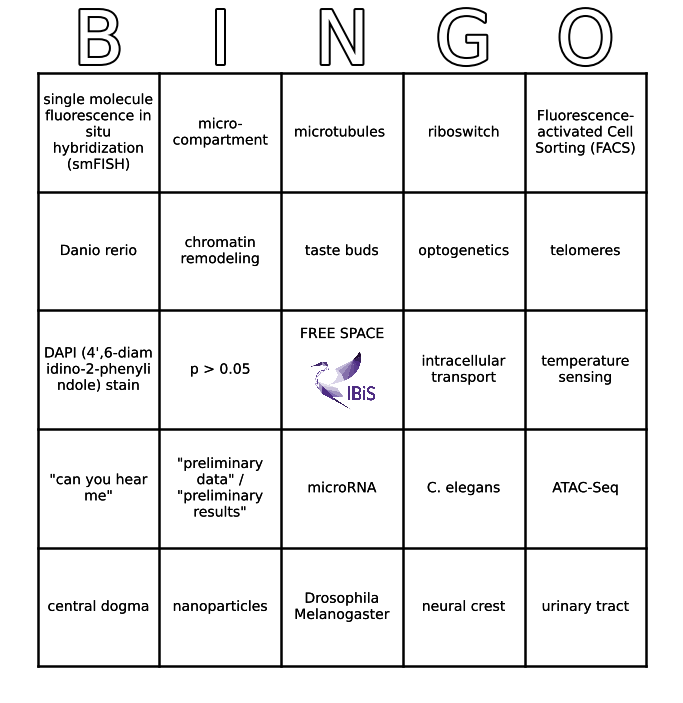

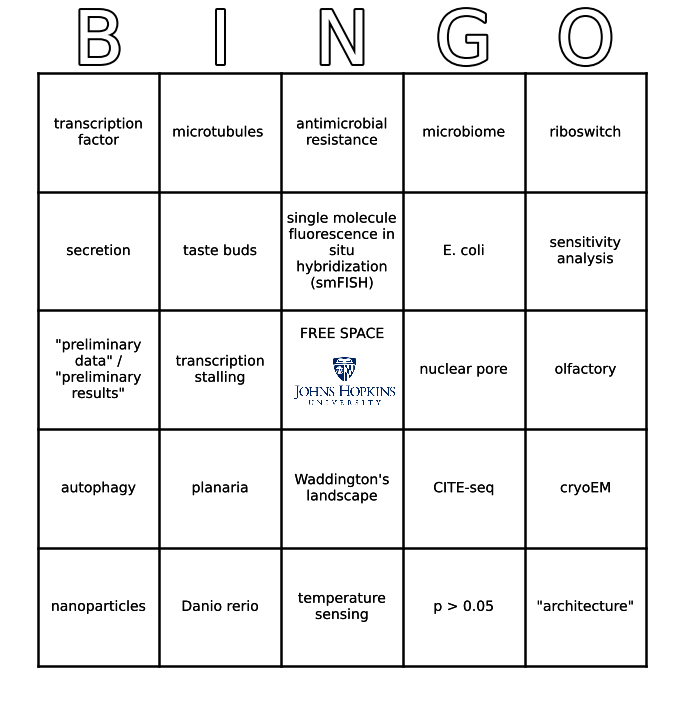

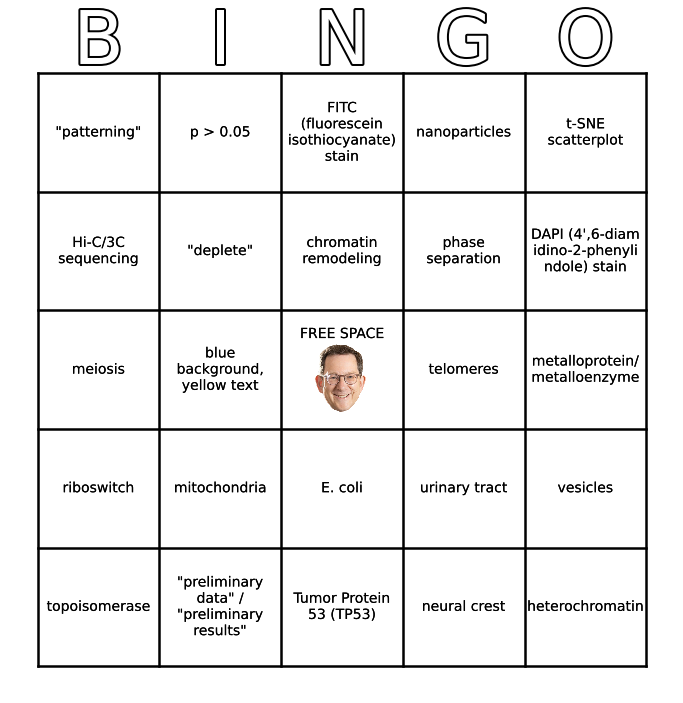

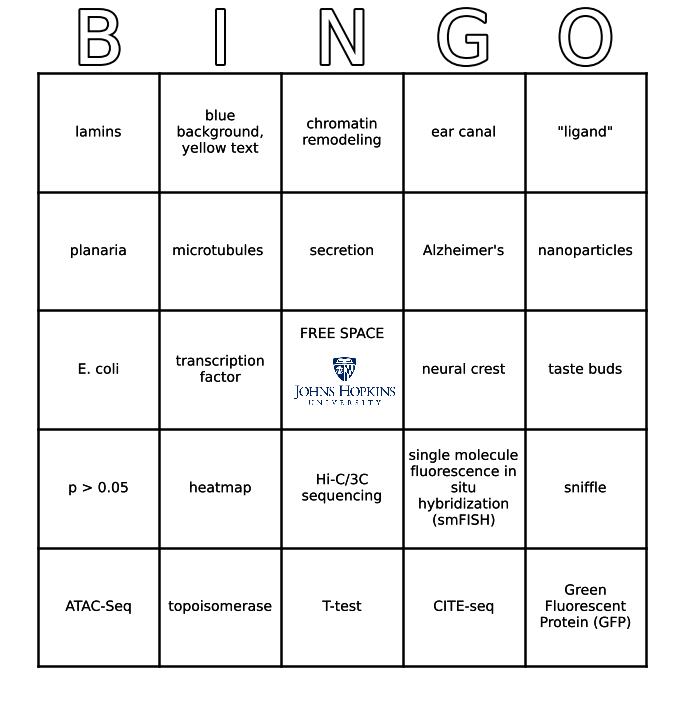

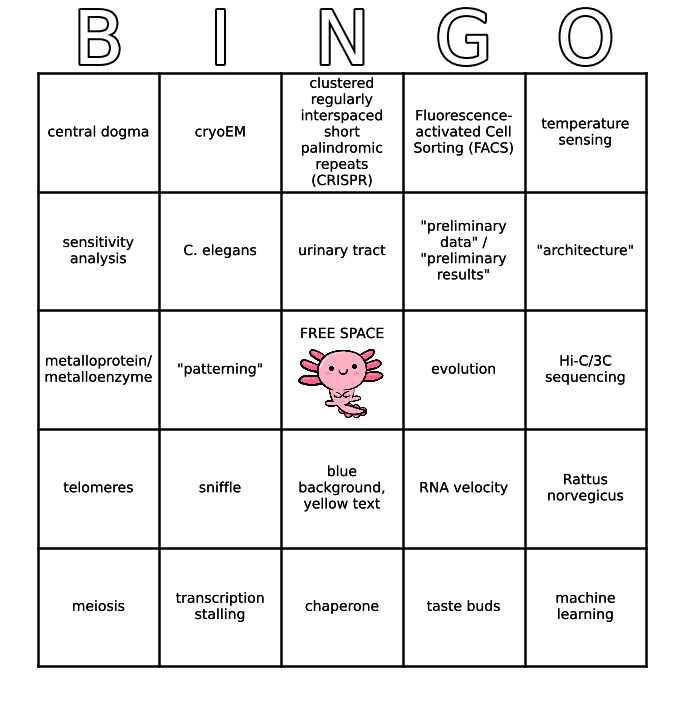

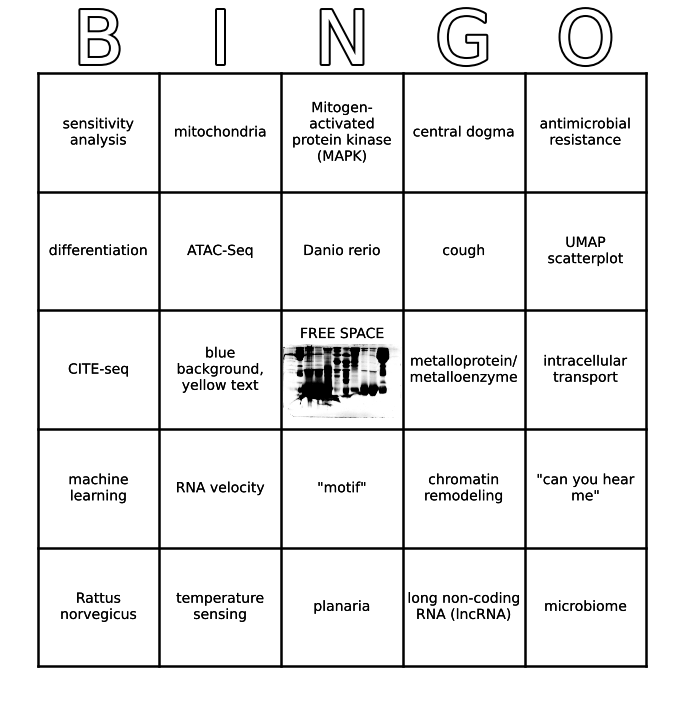

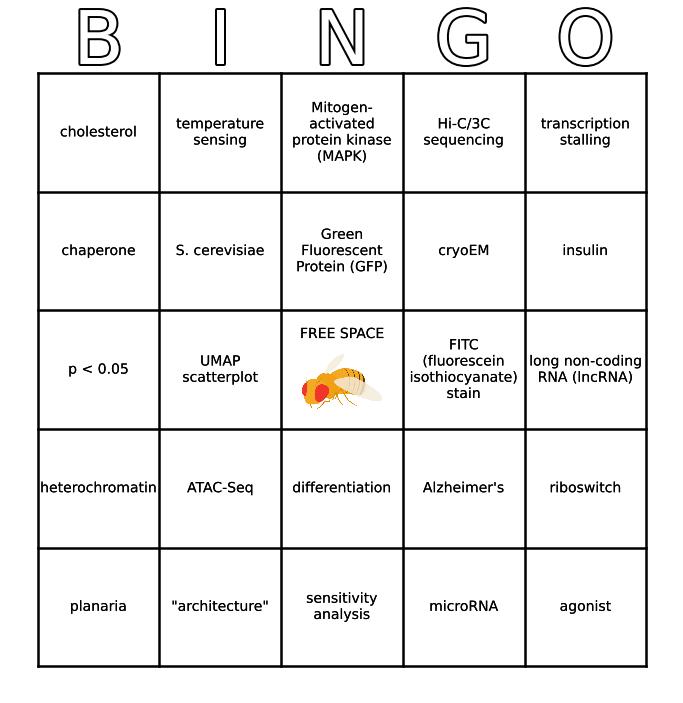

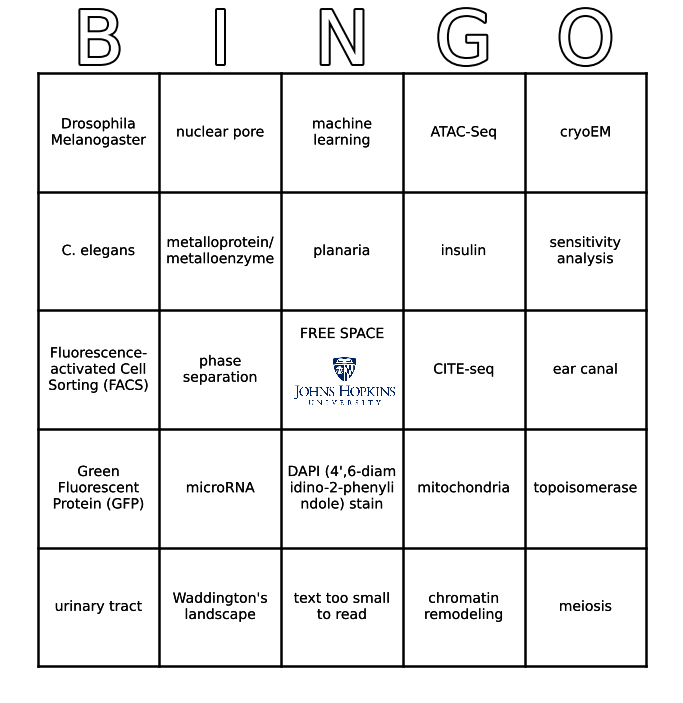

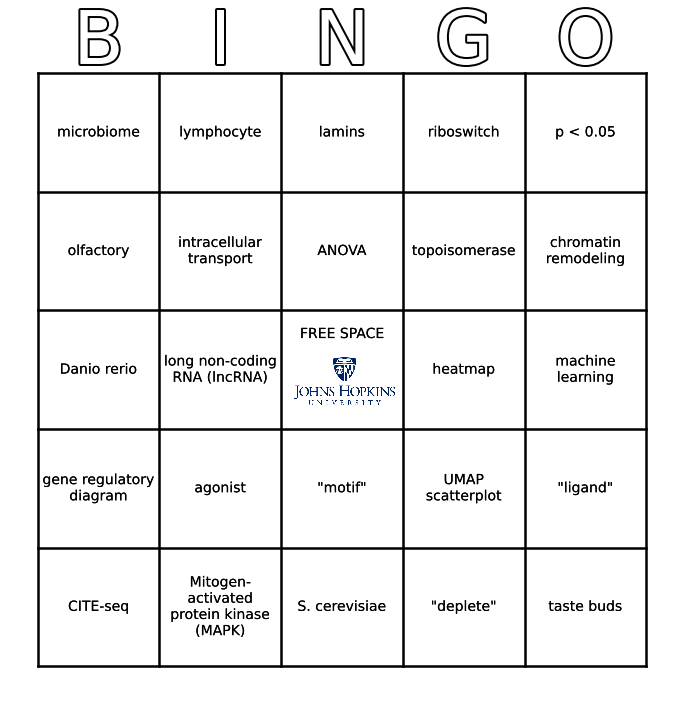

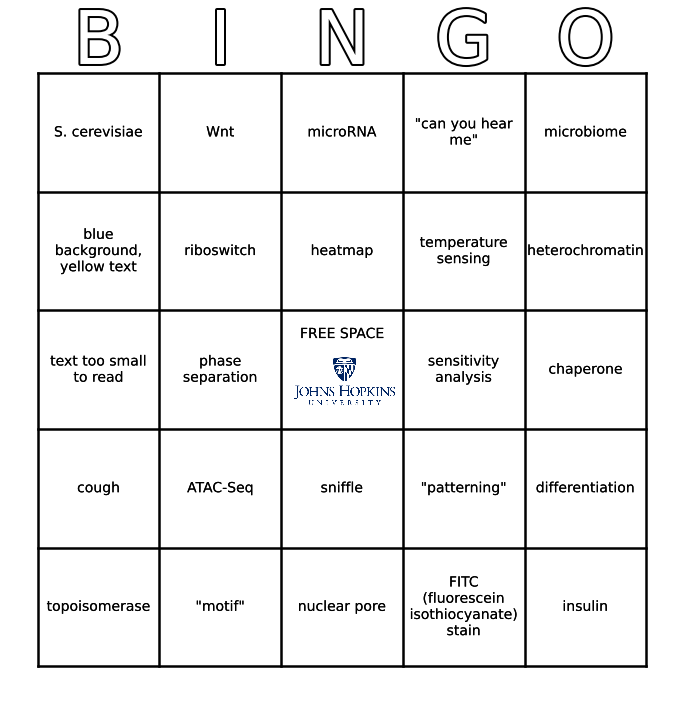

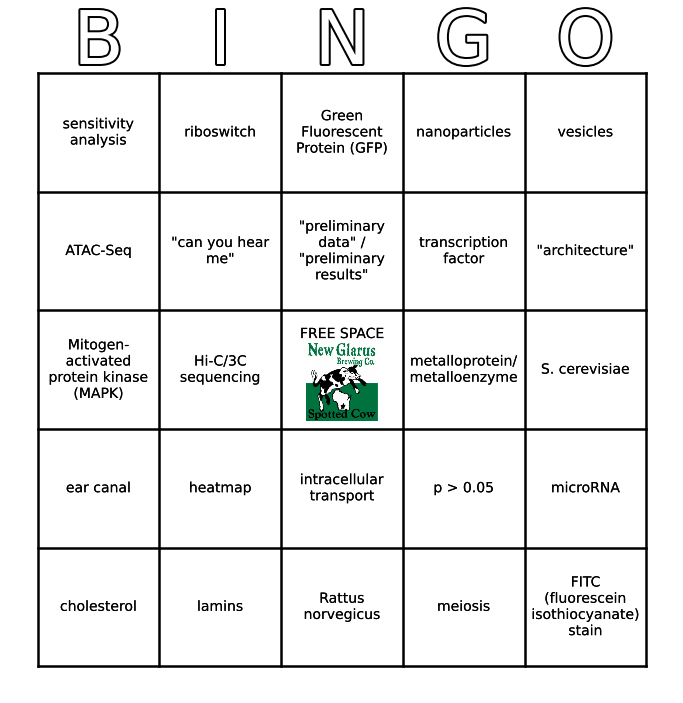

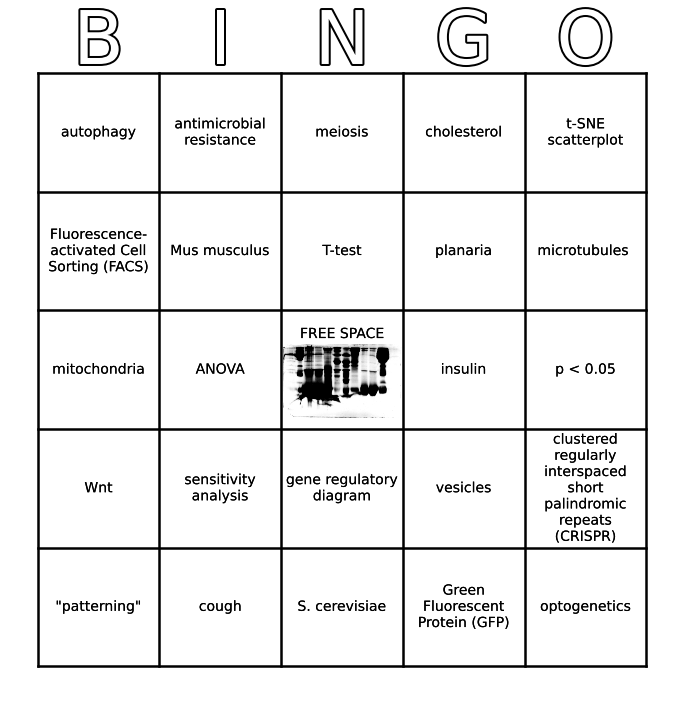

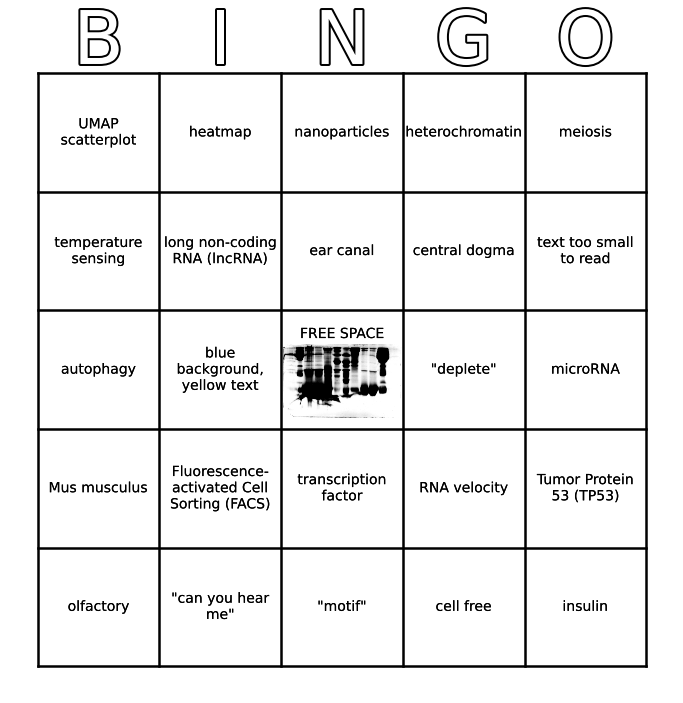

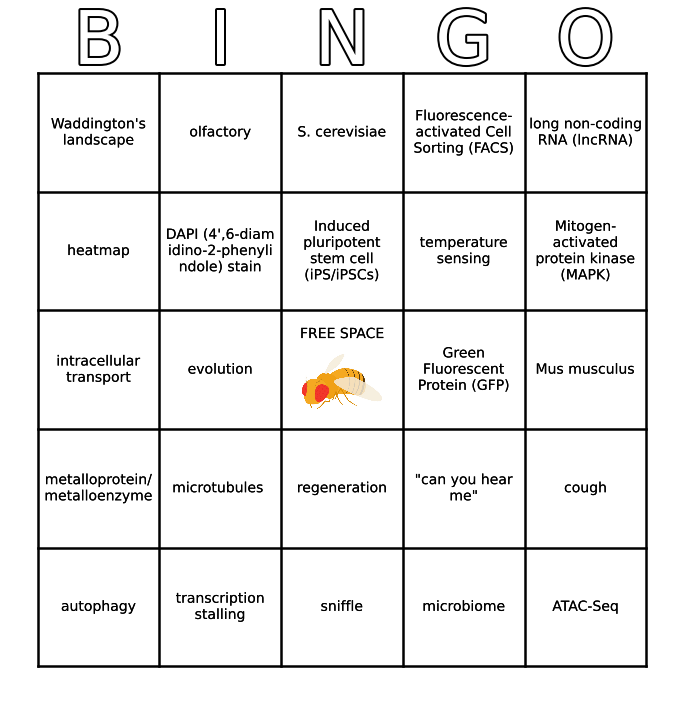

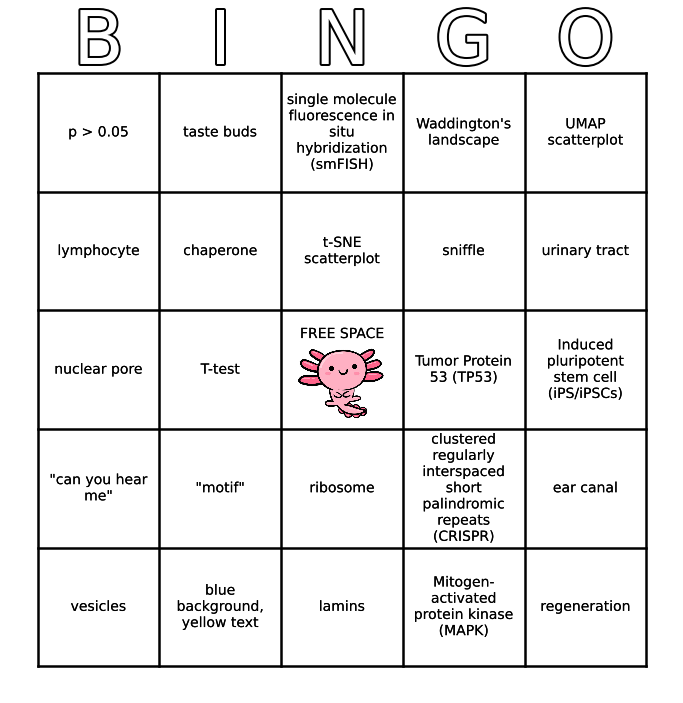

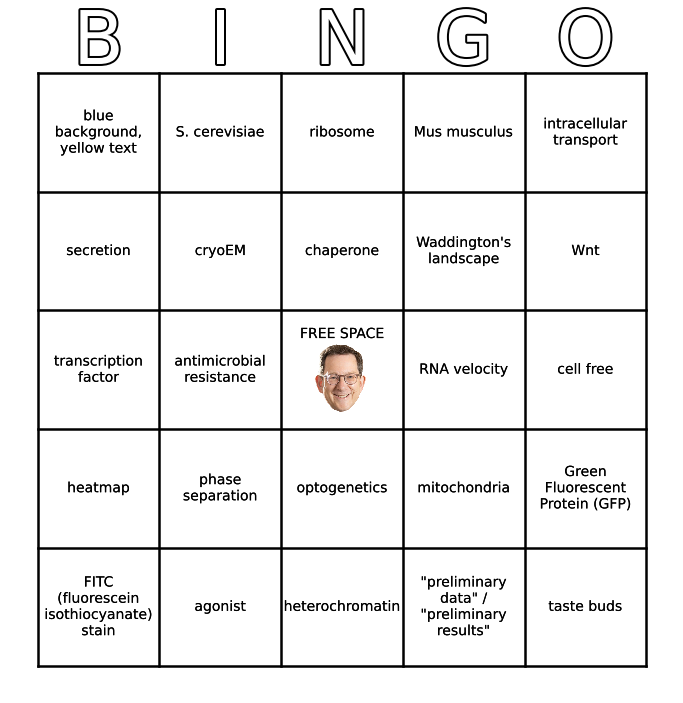

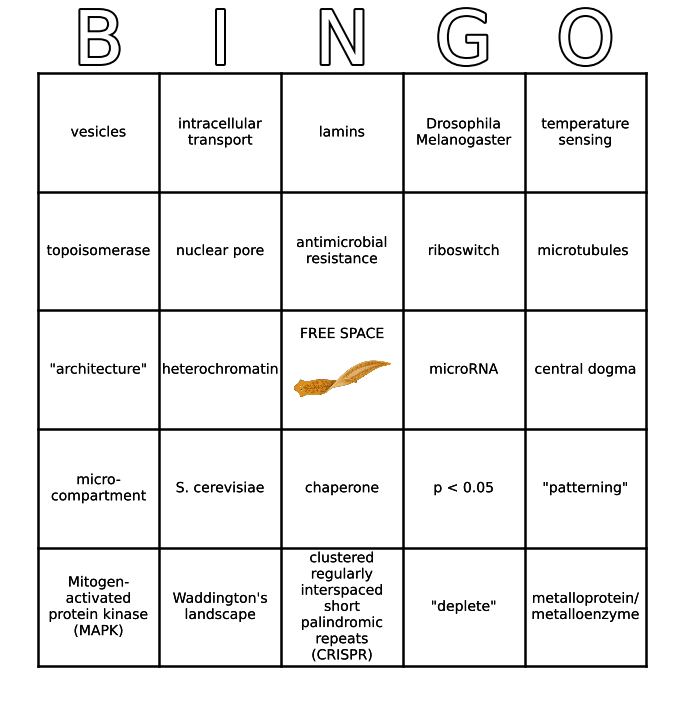

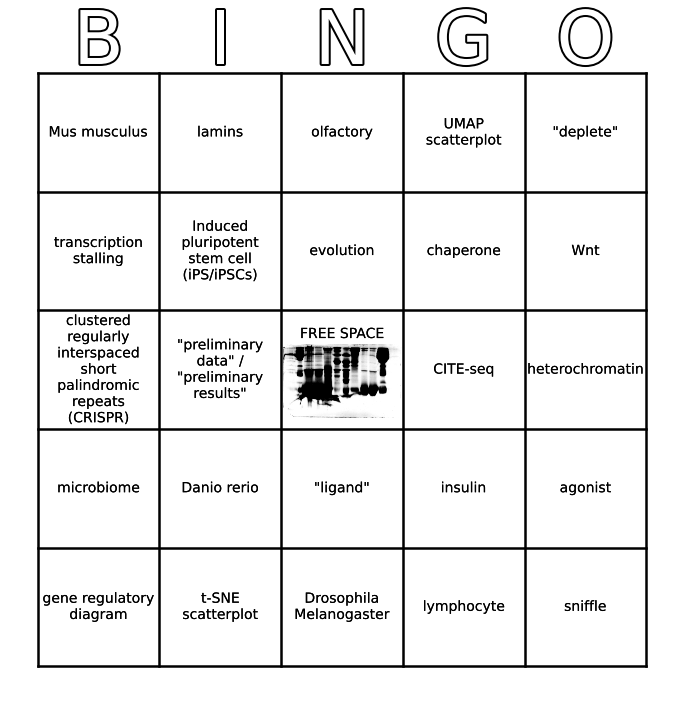

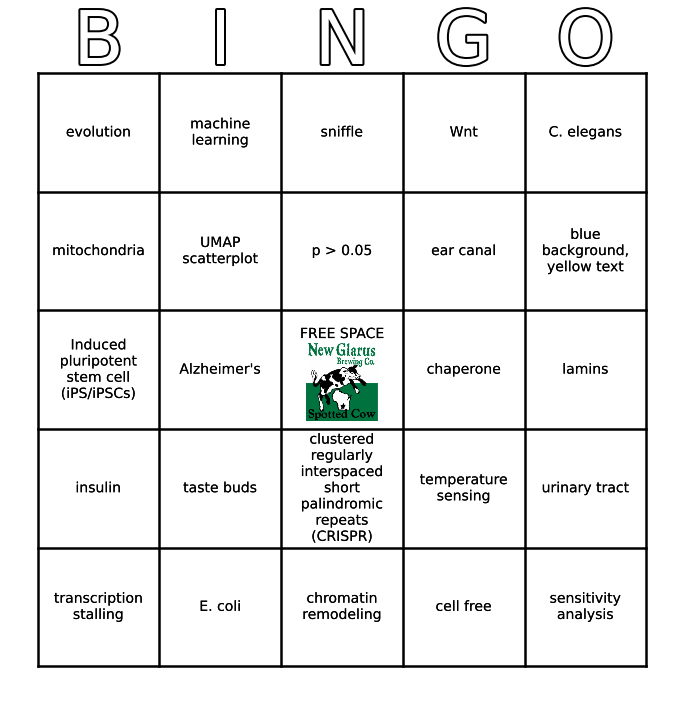

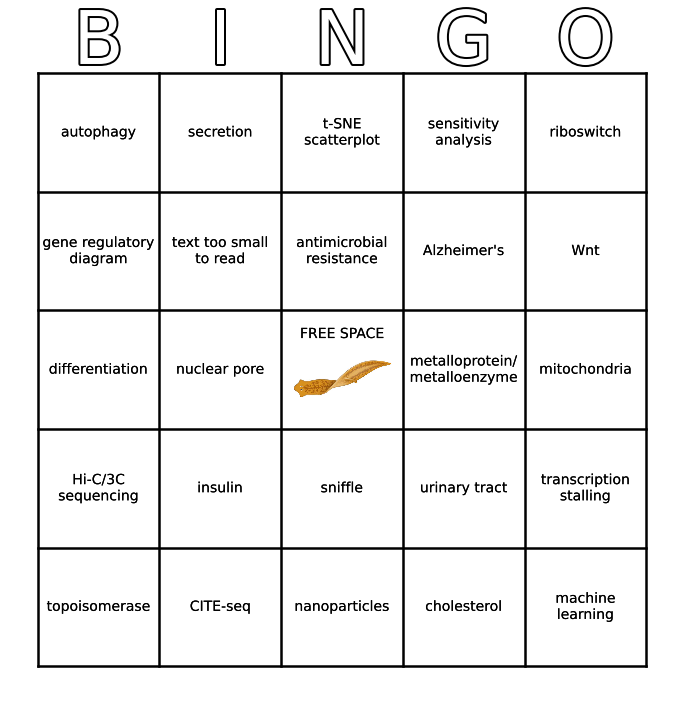

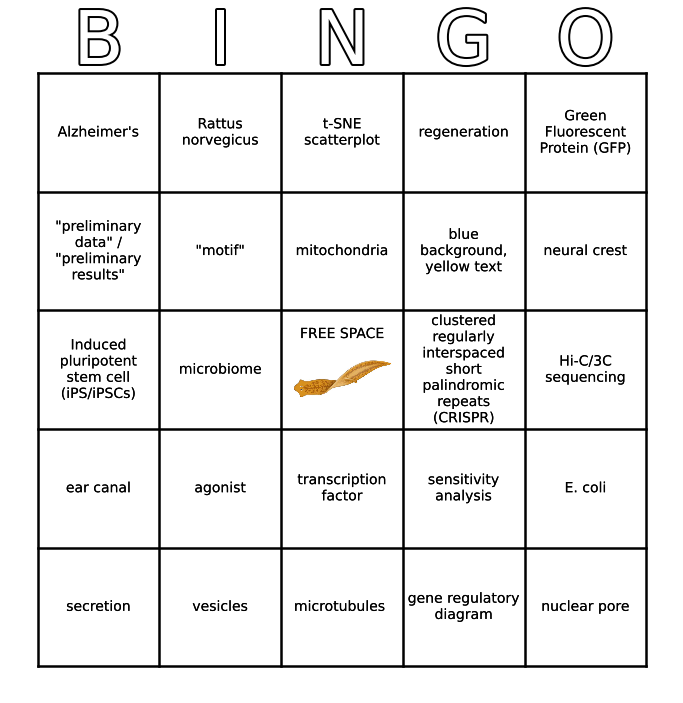

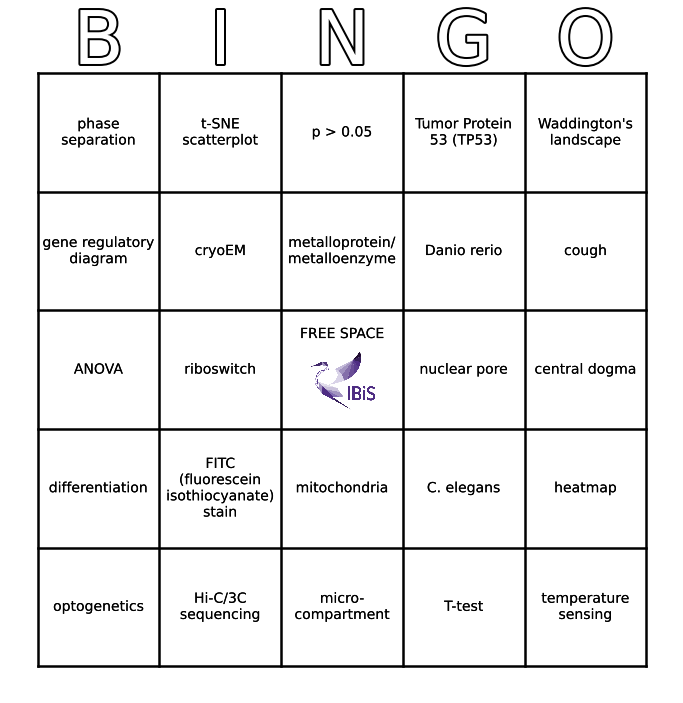

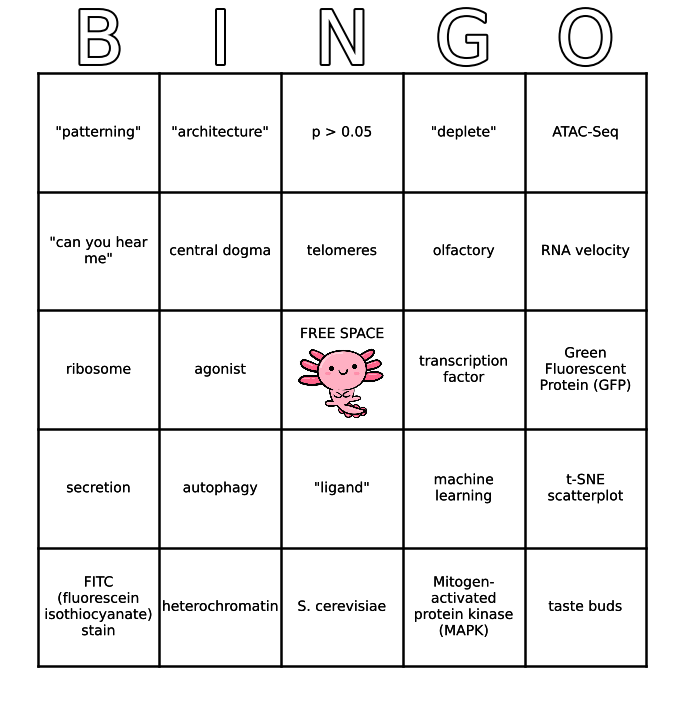

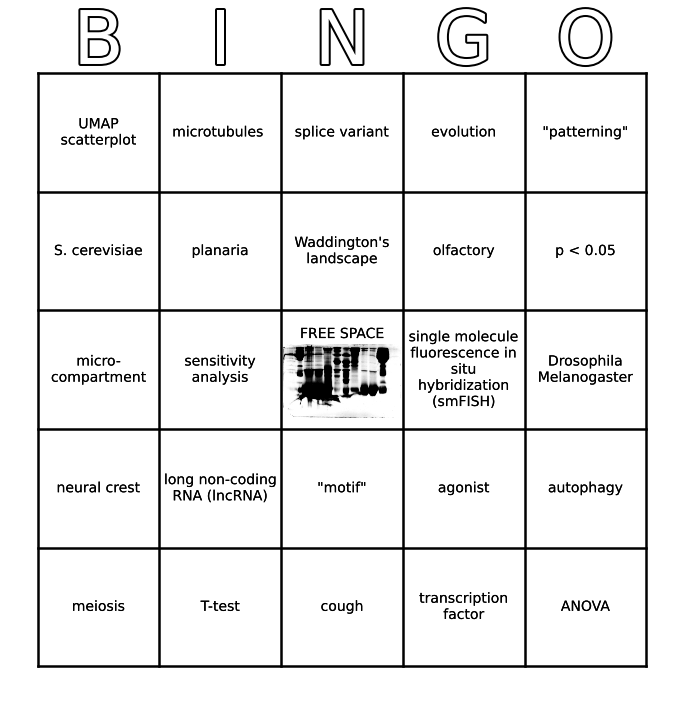

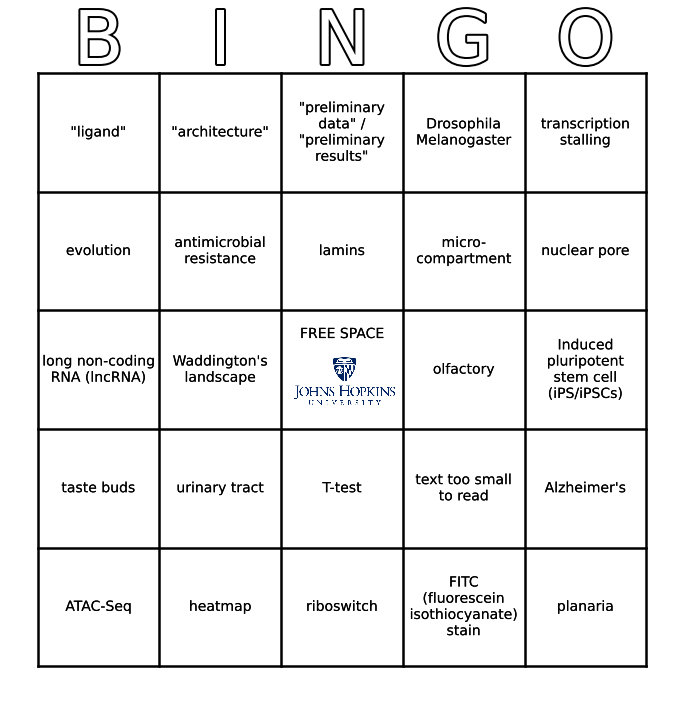

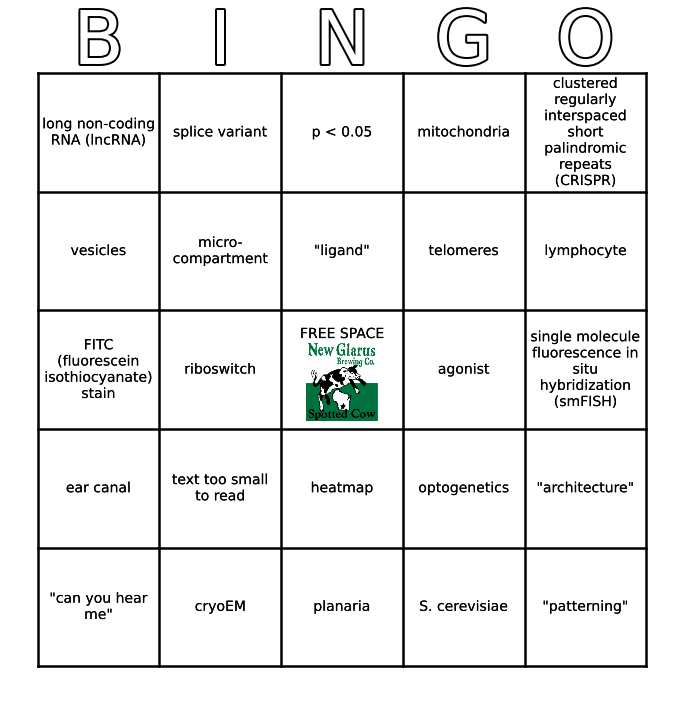

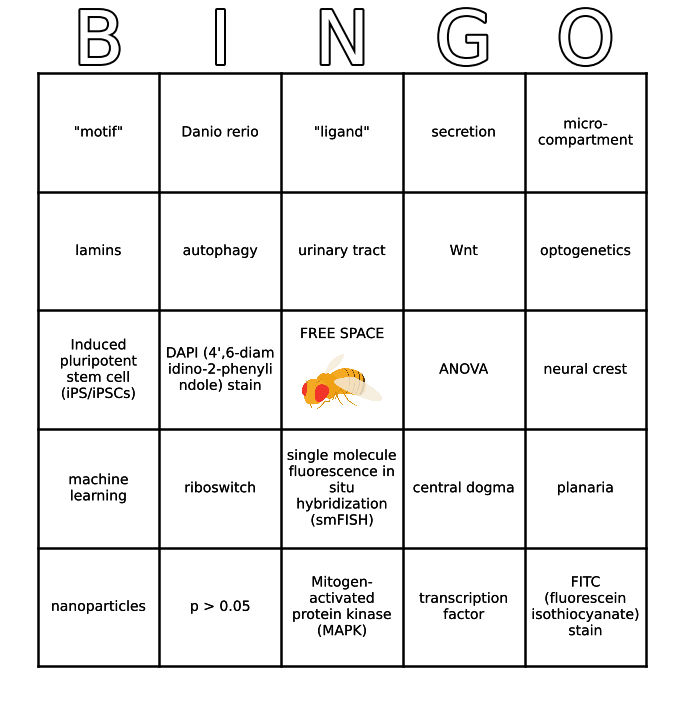

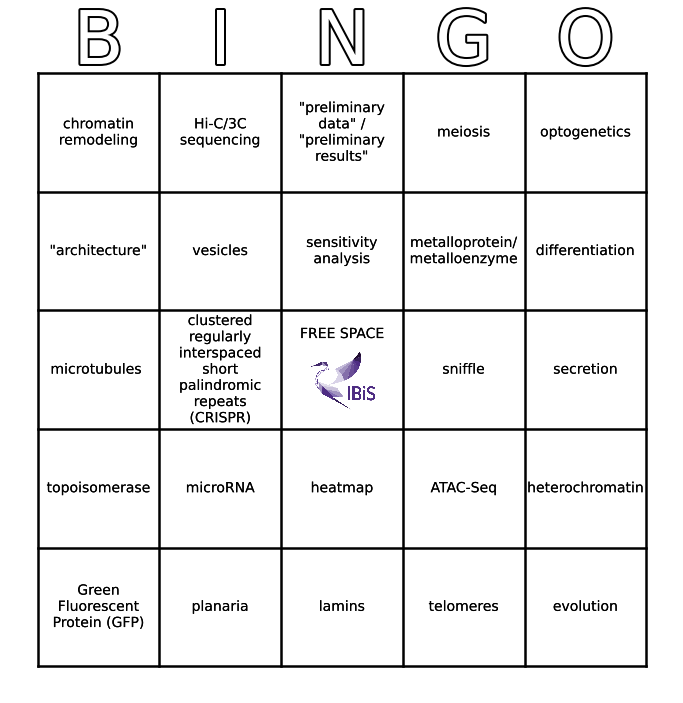

In [160]:
%%time
for i in range(100):
    retreat_bingo(song_df, filename='output_' + str(i), top_word='BINGO')

In [170]:
from PyPDF2 import PdfMerger
import os

x = ['../output/' + a for a in os.listdir('../output/') if a.endswith(".pdf")]

merger = PdfMerger()

for pdf in x:
    merger.append(open(pdf, 'rb'))

with open("../output/combined.pdf", "wb") as fout:
    merger.write(fout)